In [3]:
# -*- coding: utf-8 -*-
# cybos related
import sys
import os
proj_dir = "C:\\Users\\sh\\Documents\\devbox\\github\\auto_invest"
sys.path.append(proj_dir)
from src.utils.database import dbMeta

# math
import numpy as np
import pandas as pd
from datetime import date, datetime, timedelta

# visualization with Korean
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_loc = os.path.join(proj_dir, "asset\\human_myeongjo.ttf")
font_name = fm.FontProperties(fname=font_loc).get_name()
font = {
    'family': font_name,
    'weight': 'bold',
}
mpl.rc('font', **font)
mpl.rc('text', color='white')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
sql = """
SELECT 
    * 
FROM cybos.vw_market_eye_yesterday;
"""
engine = dbMeta.get_mysql_engine()
snapshot = pd.read_sql(sql, engine)

C:\Users\sh\Anaconda3\lib\site-packages\pymysql\cursors.py:166: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [5]:
snapshot = dbMeta.get_today_data()

C:\Users\sh\Anaconda3\lib\site-packages\pymysql\cursors.py:166: Warning: (1366, "Incorrect string value: '\\xB4\\xEB\\xC7\\xD1\\xB9\\xCE...' for column 'VARIABLE_VALUE' at row 480")
  result = self._query(query)


In [6]:
drop_cols = ['SEQ', 'QUERY_DT', 'LOAD_DT', '종목명']
df = snapshot.drop(drop_cols, axis=1, errors='ignore')
df.describe()

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>시간</th>
      <th>대비부호</th>
      <th>전일대비</th>
      <th>현재가</th>
      <th>시가</th>
      <th>고가</th>
      <th>저가</th>
      <th>매도호가</th>
      <th>매수호가</th>
      <th>거래량</th>
      <th>...</th>
      <th>ELW_델타</th>
      <th>ELW_발행수량</th>
      <th>ELW_베가</th>
      <th>ELW_세타</th>
      <th>ELW_손익분기율</th>
      <th>ELW_역사적변동성</th>
      <th>ELW_자본지지점</th>
      <th>ELW_패리티</th>
      <th>ELW_프리미엄</th>
      <th>ELW_베리어</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>157342.000000</td>
      <td>157342.000000</td>
      <td>157342.000000</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>...</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>157342.000000</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
      <td>1.573420e+05</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>1241.901336</td>
      <td>51.780262</td>
      <td>-157.677480</td>
      <td>6.591374e+04</td>
      <td>6.579900e+04</td>
      <td>6.665880e+04</td>
      <td>6.518611e+04</td>
      <td>6.597607e+04</td>
      <td>6.584033e+04</td>
      <td>3.349127e+05</td>
      <td>...</td>
      <td>-3.506171e+07</td>
      <td>4.113718e+08</td>
      <td>-3.159579e+06</td>
      <td>-1074.026566</td>
      <td>7.619039e+05</td>
      <td>3.984852e+04</td>
      <td>-4.314765e+04</td>
      <td>7.870469e+05</td>
      <td>-6.202892e+03</td>
      <td>-1.260274e+05</td>
    </tr>
    <tr>
      <th>std</th>
      <td>163.556152</td>
      <td>1.423180</td>
      <td>2409.935753</td>
      <td>1.809001e+05</td>
      <td>1.801226e+05</td>
      <td>1.821719e+05</td>
      <td>1.791588e+05</td>
      <td>1.809833e+05</td>
      <td>1.807991e+05</td>
      <td>2.342010e+06</td>
      <td>...</td>
      <td>4.265135e+08</td>
      <td>1.028580e+09</td>
      <td>4.632574e+08</td>
      <td>40754.585492</td>
      <td>5.322261e+06</td>
      <td>5.046496e+06</td>
      <td>4.260186e+06</td>
      <td>5.293657e+06</td>
      <td>5.000439e+06</td>
      <td>4.375519e+06</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>48.000000</td>
      <td>-22000.000000</td>
      <td>2.750000e+02</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>...</td>
      <td>-2.123235e+09</td>
      <td>0.000000e+00</td>
      <td>-2.130706e+09</td>
      <td>-212730.000000</td>
      <td>-2.147484e+07</td>
      <td>-2.147405e+07</td>
      <td>-2.130706e+07</td>
      <td>-2.147484e+07</td>
      <td>-2.130706e+07</td>
      <td>-2.143158e+07</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>1114.000000</td>
      <td>50.000000</td>
      <td>-200.000000</td>
      <td>5.810000e+03</td>
      <td>5.720000e+03</td>
      <td>5.940000e+03</td>
      <td>5.690000e+03</td>
      <td>5.820000e+03</td>
      <td>5.800000e+03</td>
      <td>1.277600e+04</td>
      <td>...</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
      <td>0.000000e+00</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>1236.000000</td>
      <td>53.000000</td>
      <td>-20.000000</td>
      <td>1.790000e

In [7]:
from sklearn.preprocessing import StandardScaler

def get_stock_name(code):
    ix = snapshot[snapshot['종목코드'] == code].index.tolist()[0]
    return snapshot[snapshot['종목코드'] == code]['종목명'][ix]

def normalize_series(series):
    values = series.values
    values = values.reshape((len(values), 1))
    scaler = StandardScaler()
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    return normalized

def get_time_derivative(df, code, col):
    if df.index.names[0] == '시간':
        df['time_in_min'] = pd.Series(list(map(lambda x: int(str(x)[:-2]) * 60 + int(str(x)[-2:]), df.index.tolist())))
    else:
        df['time_in_min'] = df['시간'].apply(lambda x: int(str(x)[:-2]) * 60 + int(str(x)[-2:]))
    df['dt'] = df['time_in_min'].diff()
    df['col_dt'] = df[col].diff()
    c_name = 'deriv_%s' % col
    df[c_name] = df['col_dt'] / df['dt']
    df.drop(['time_in_min', 'dt', 'col_dt'], inplace=True, errors='ignore')
    df = df.fillna(0)
    return (df, c_name)

def int_to_time(x):
    x = '0000' if x == 0 else x
    return datetime.combine(date.today(), datetime.min.time()) + timedelta(hours=int(str(x)[:-2]), minutes=int(str(x)[-2:]))

C:\Users\sh\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\sh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


C:\Users\sh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


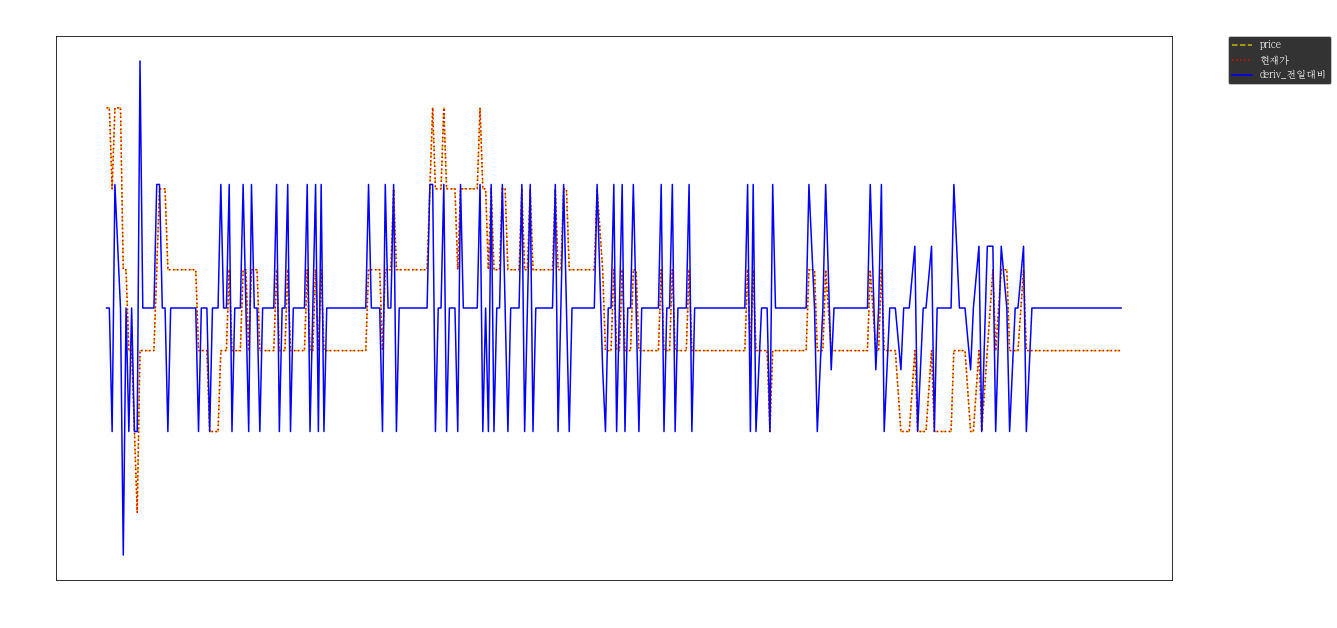

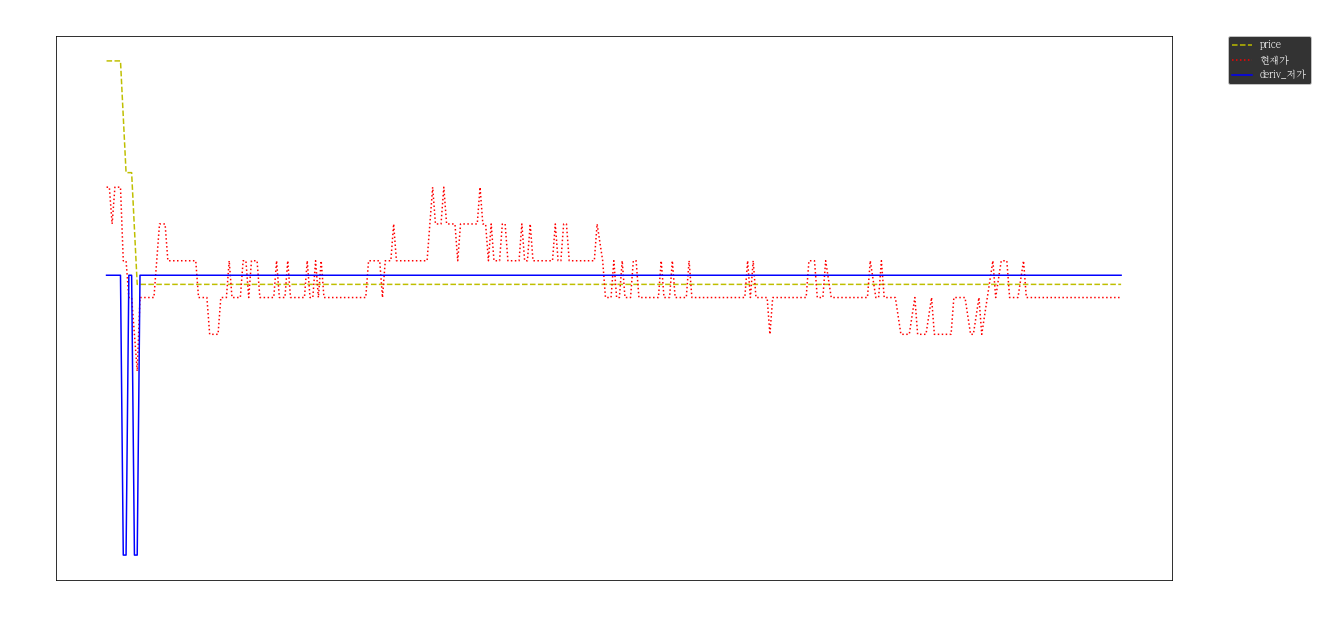

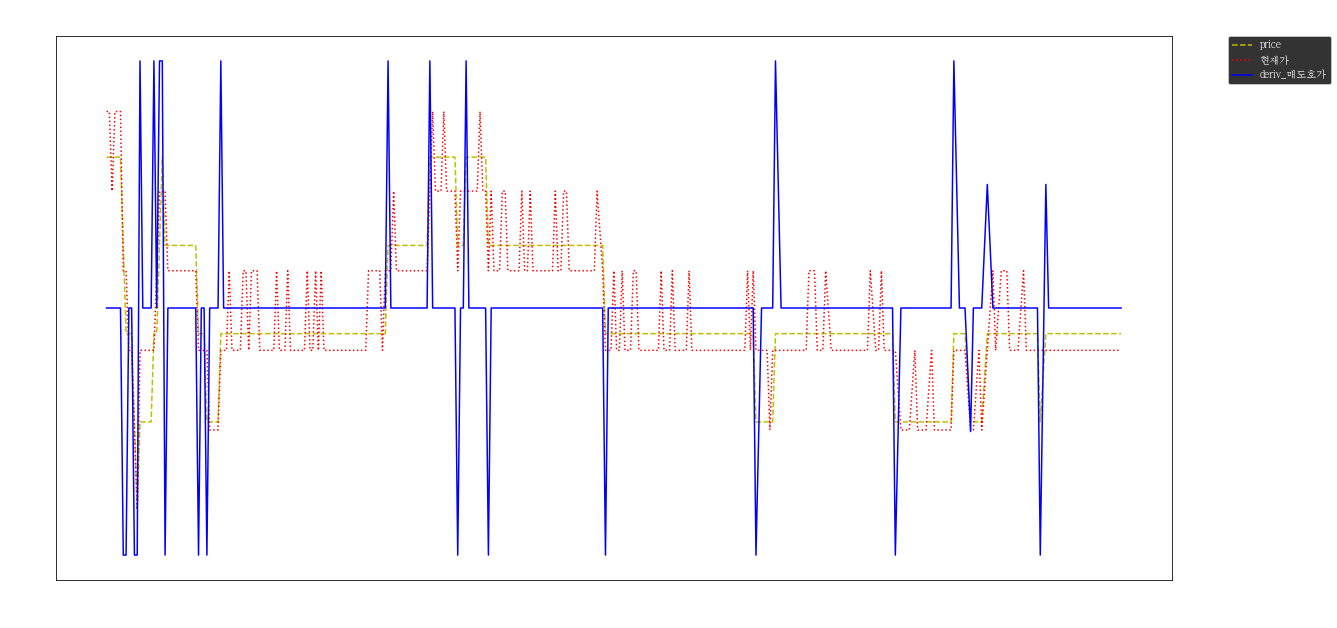

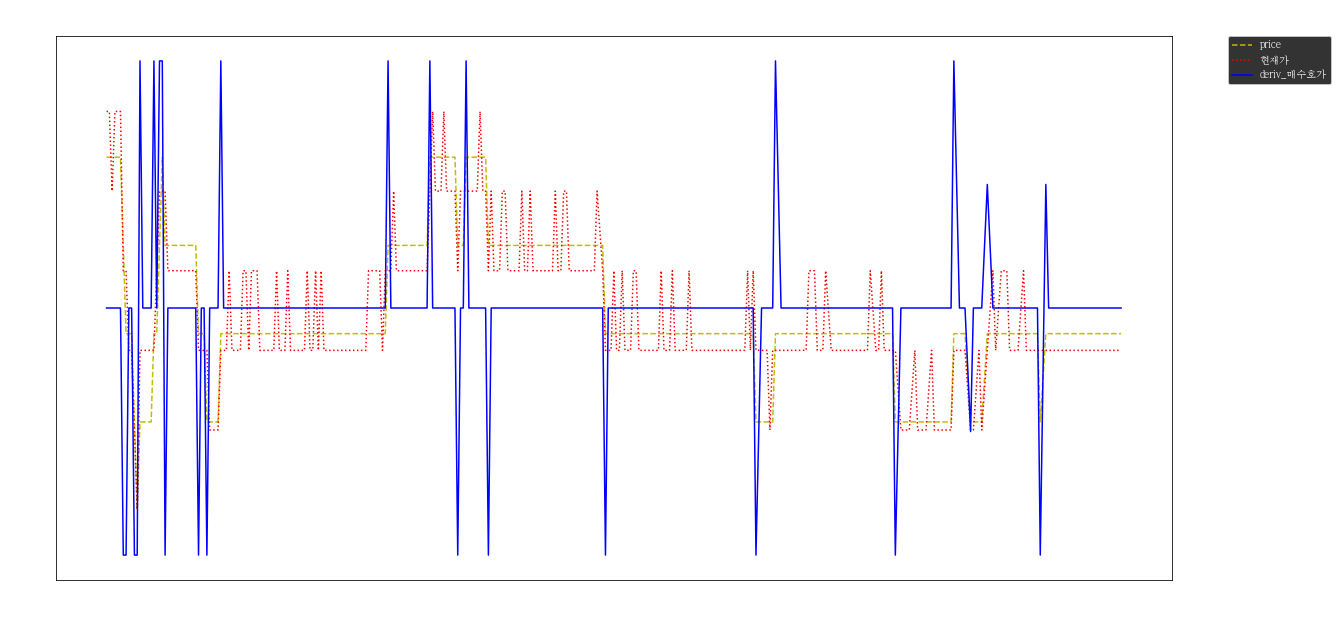

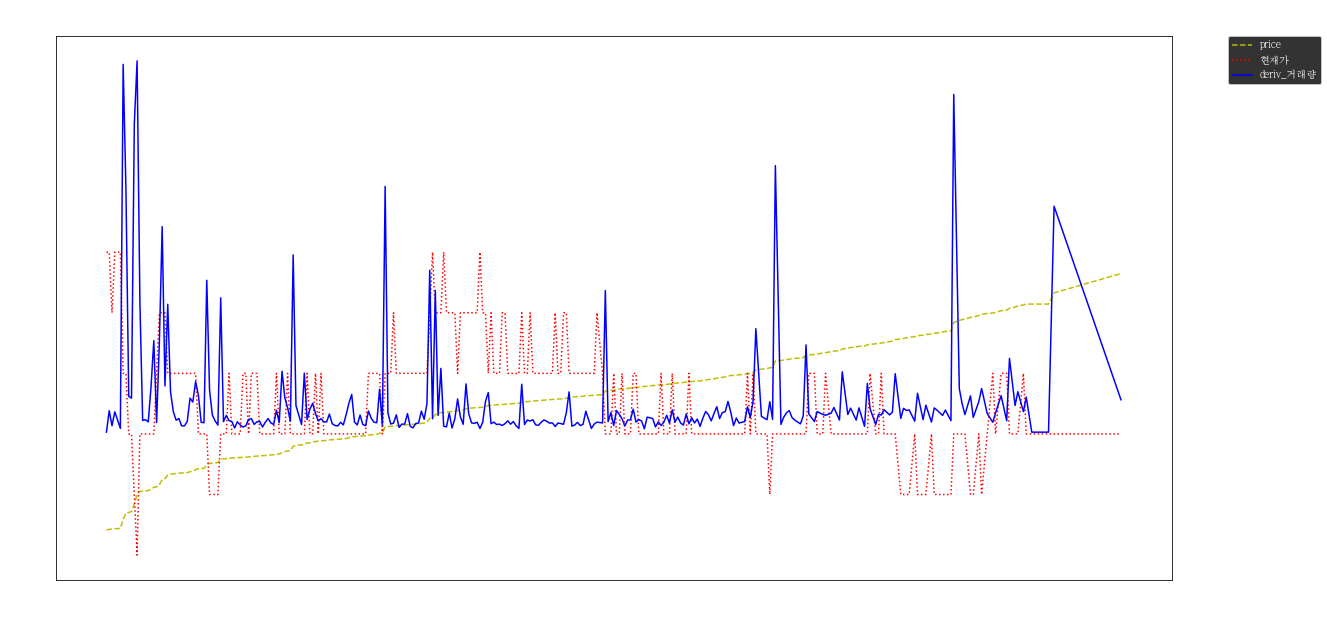

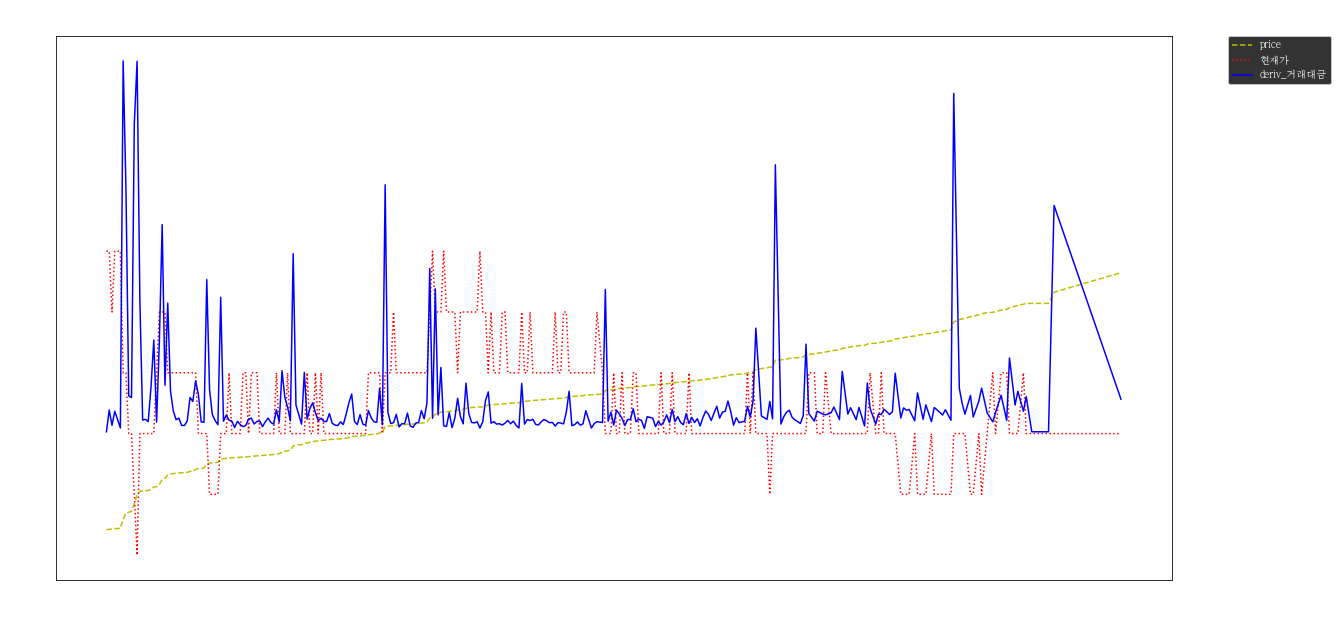

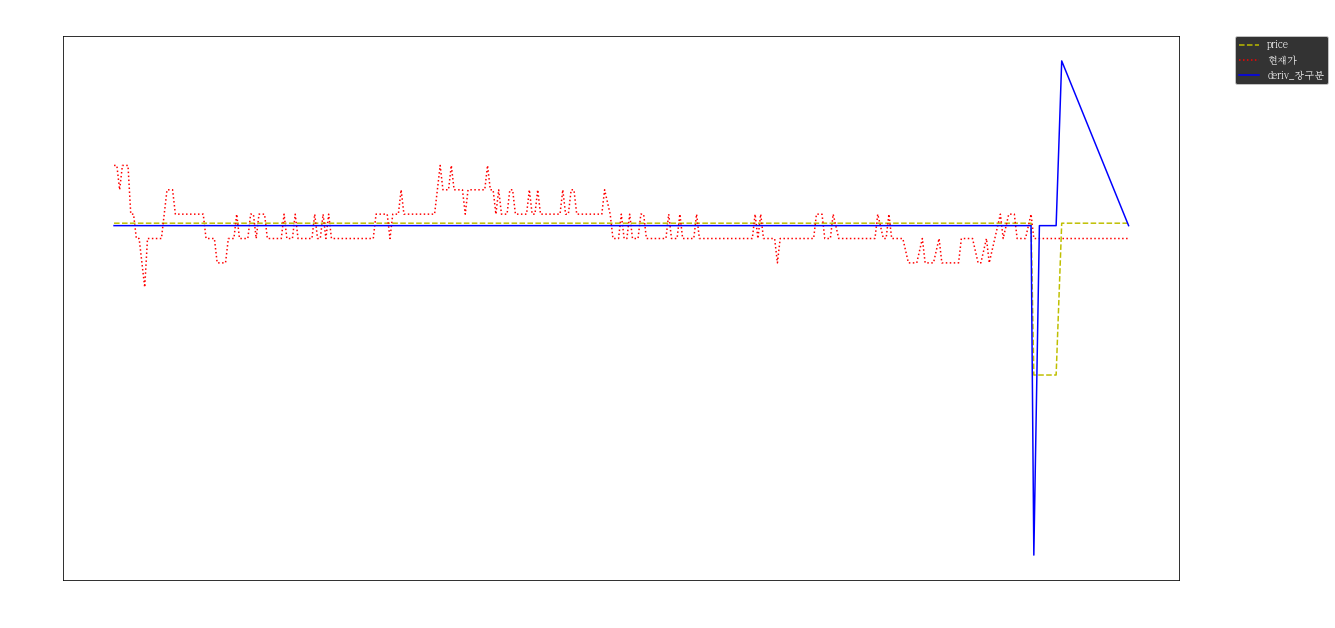

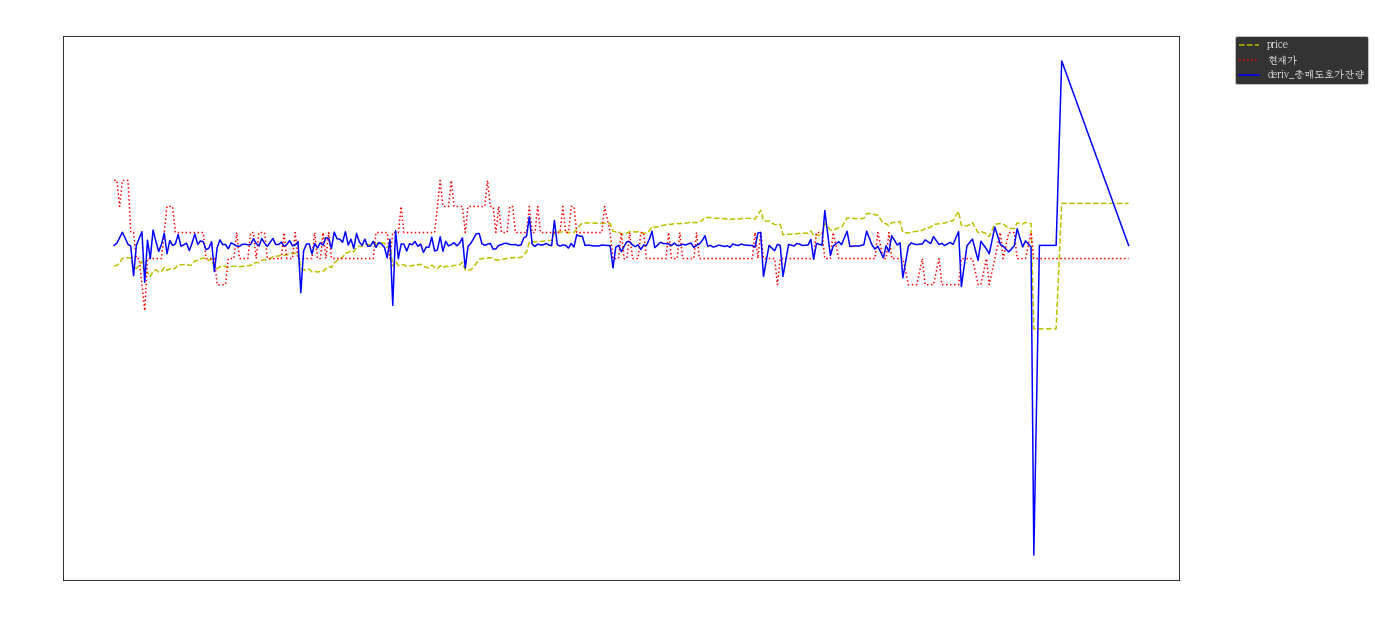

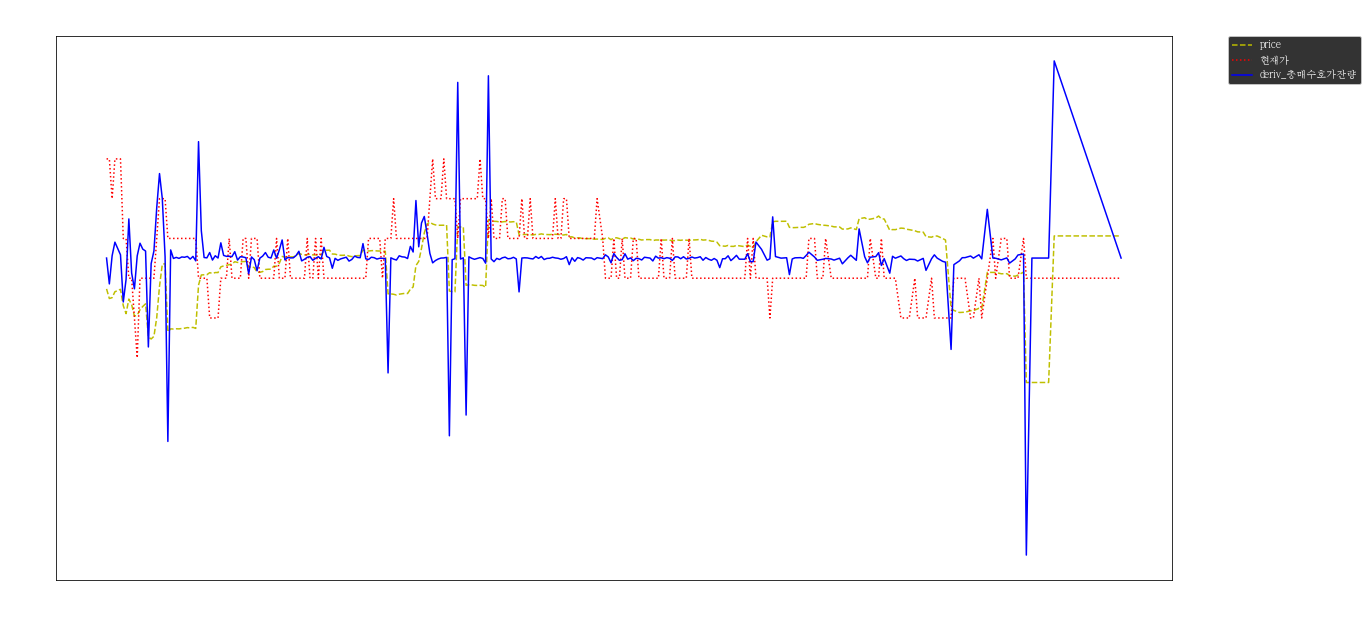

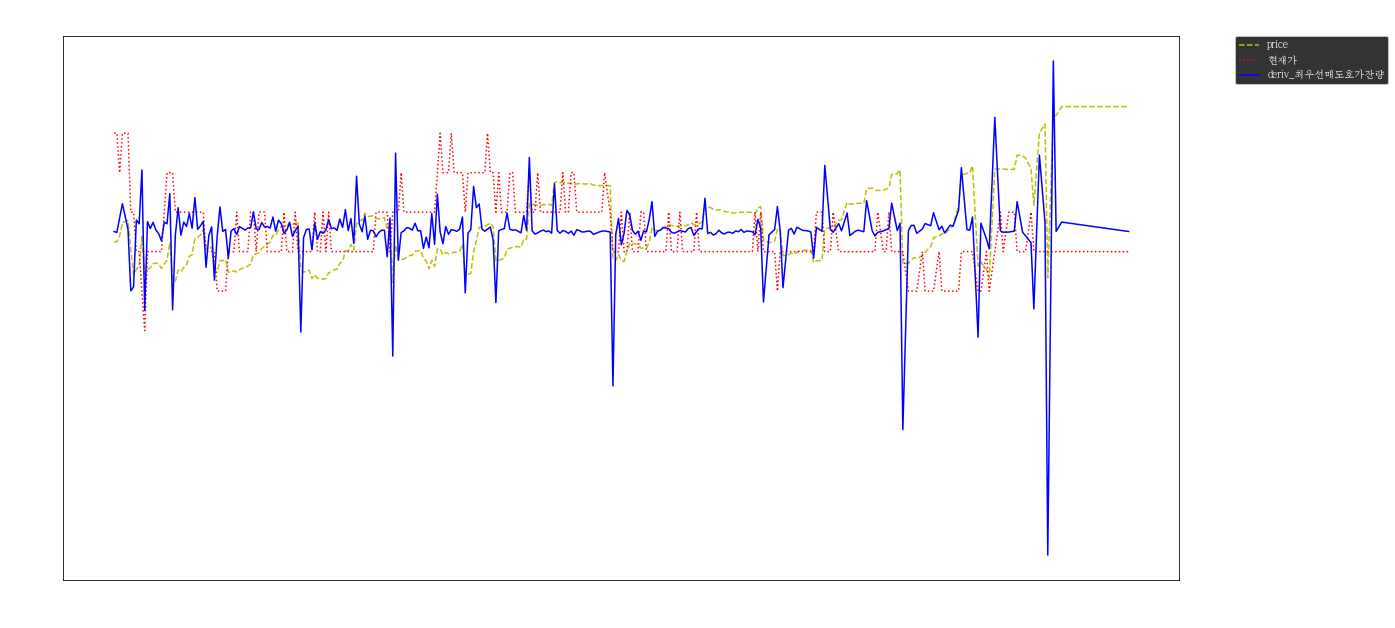

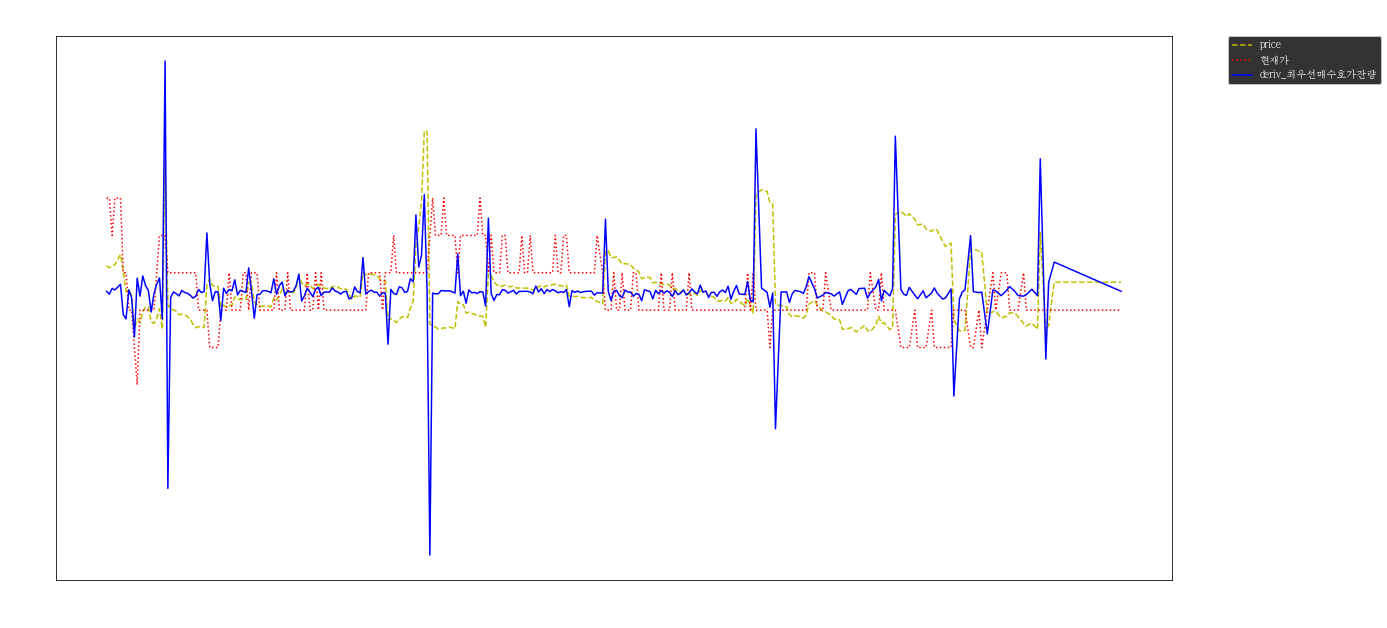

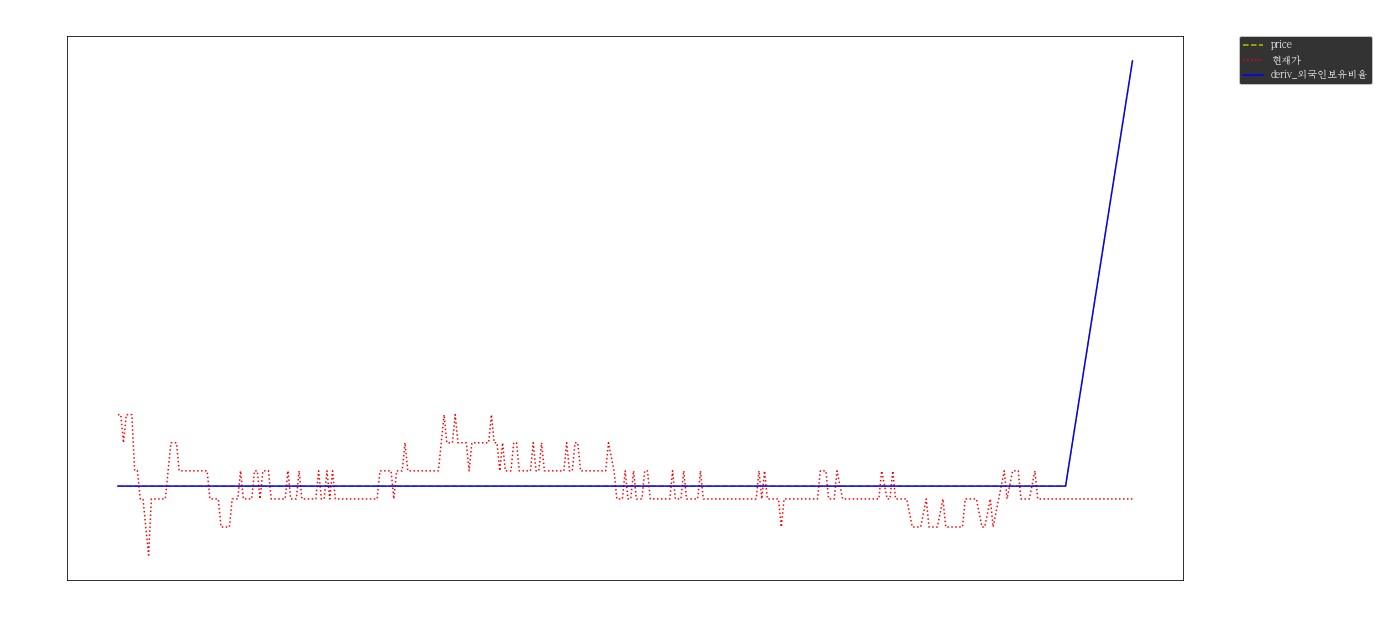

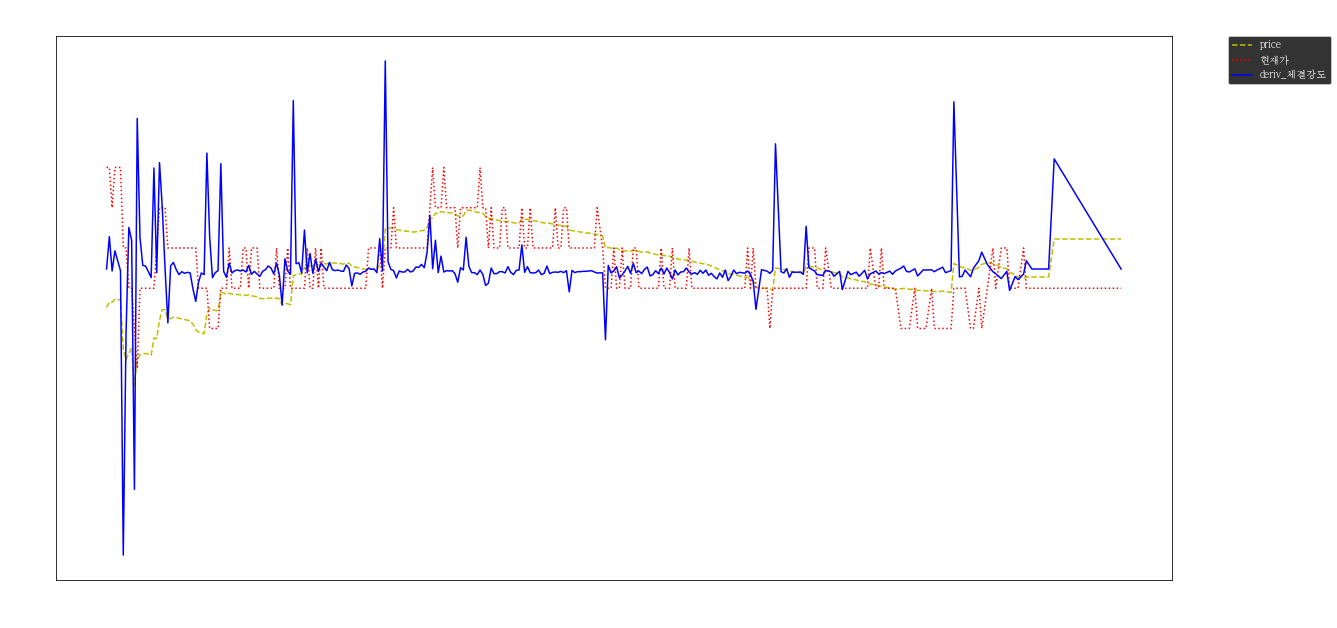

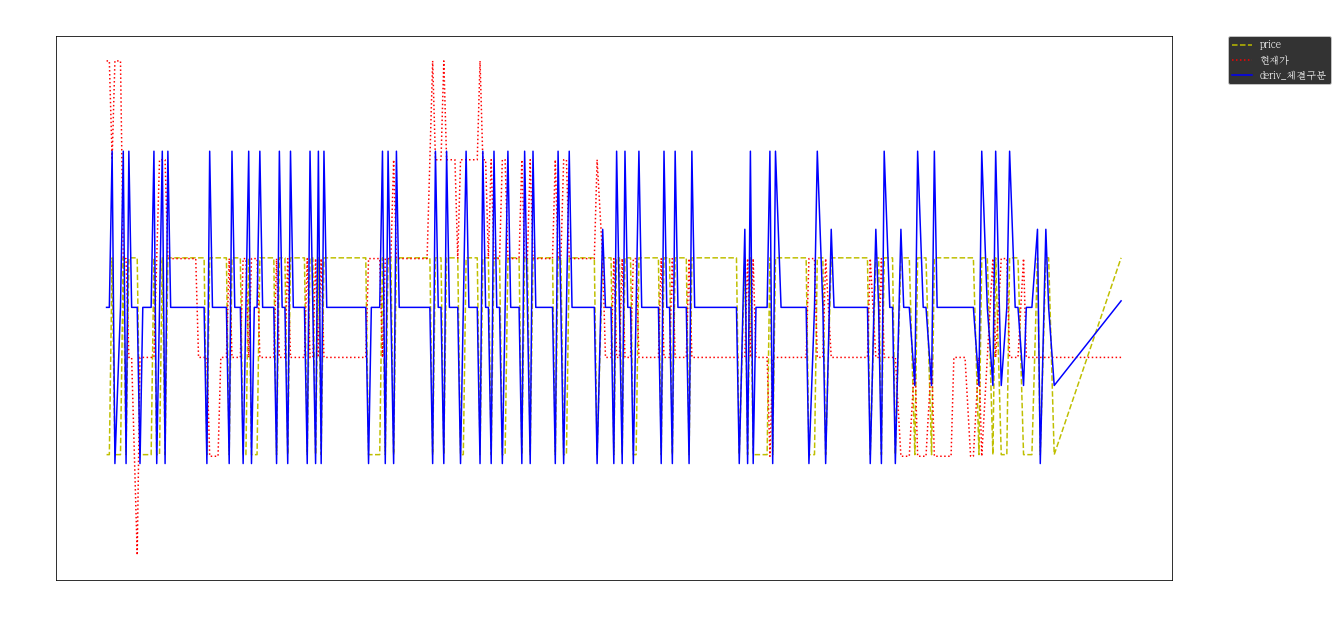

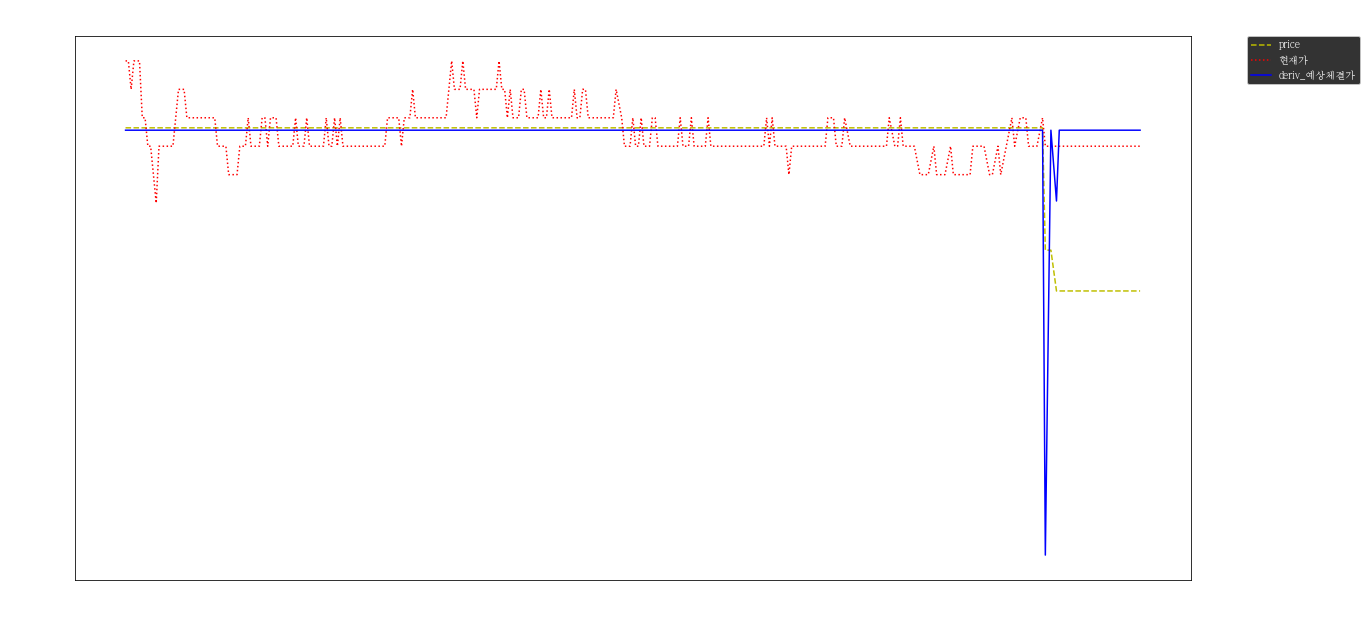

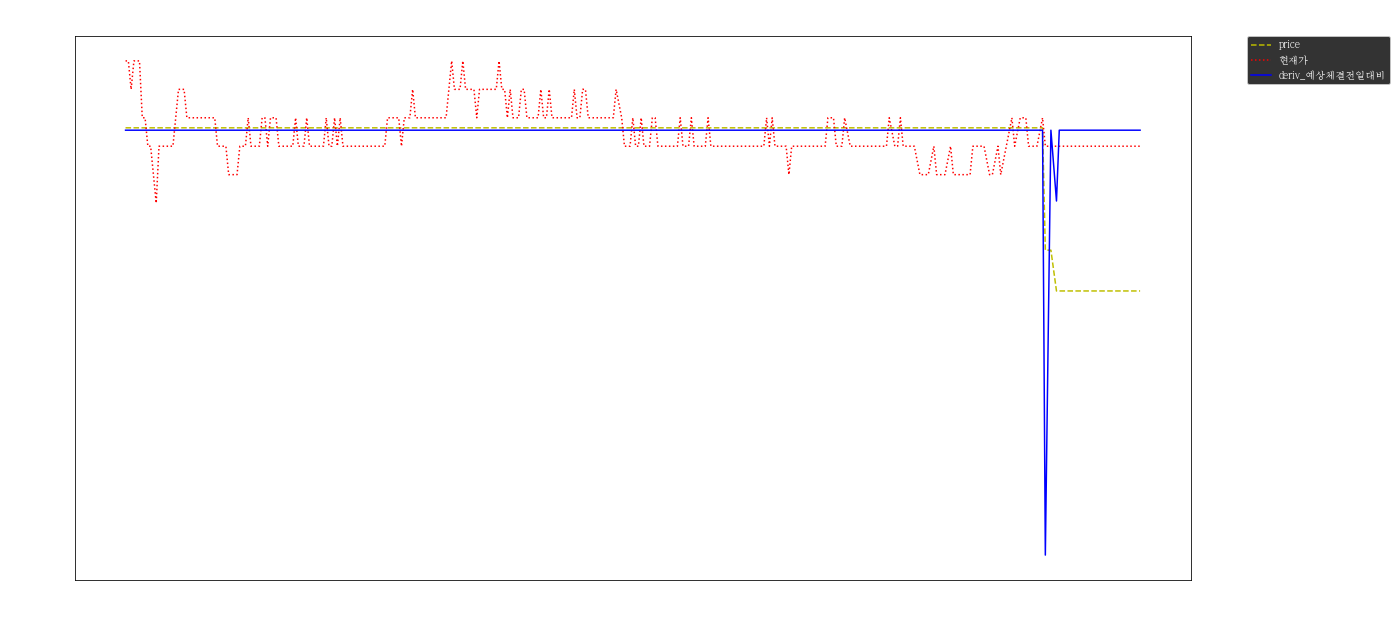

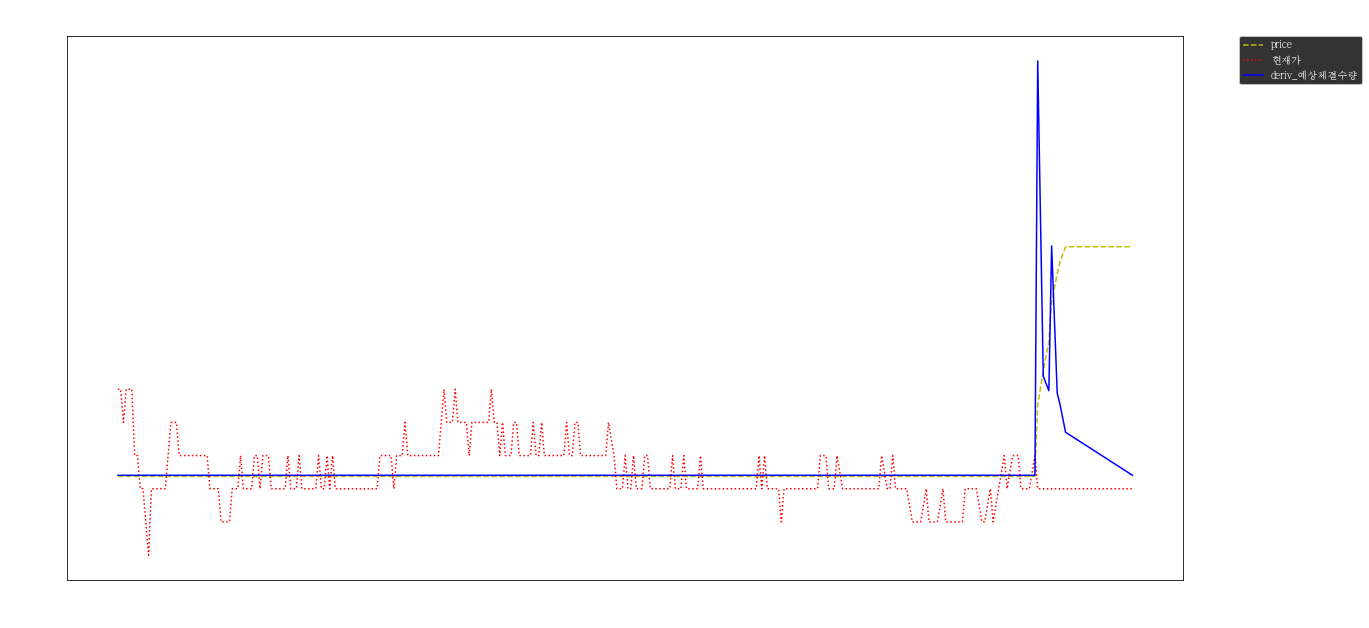

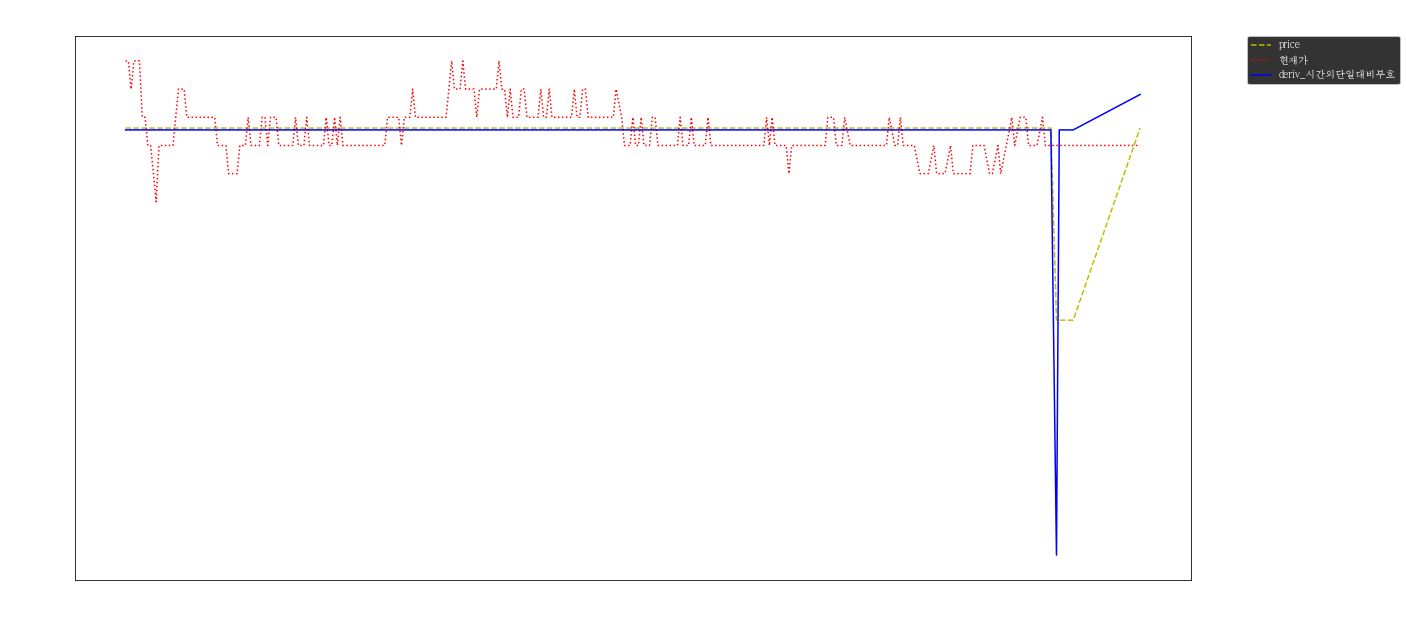

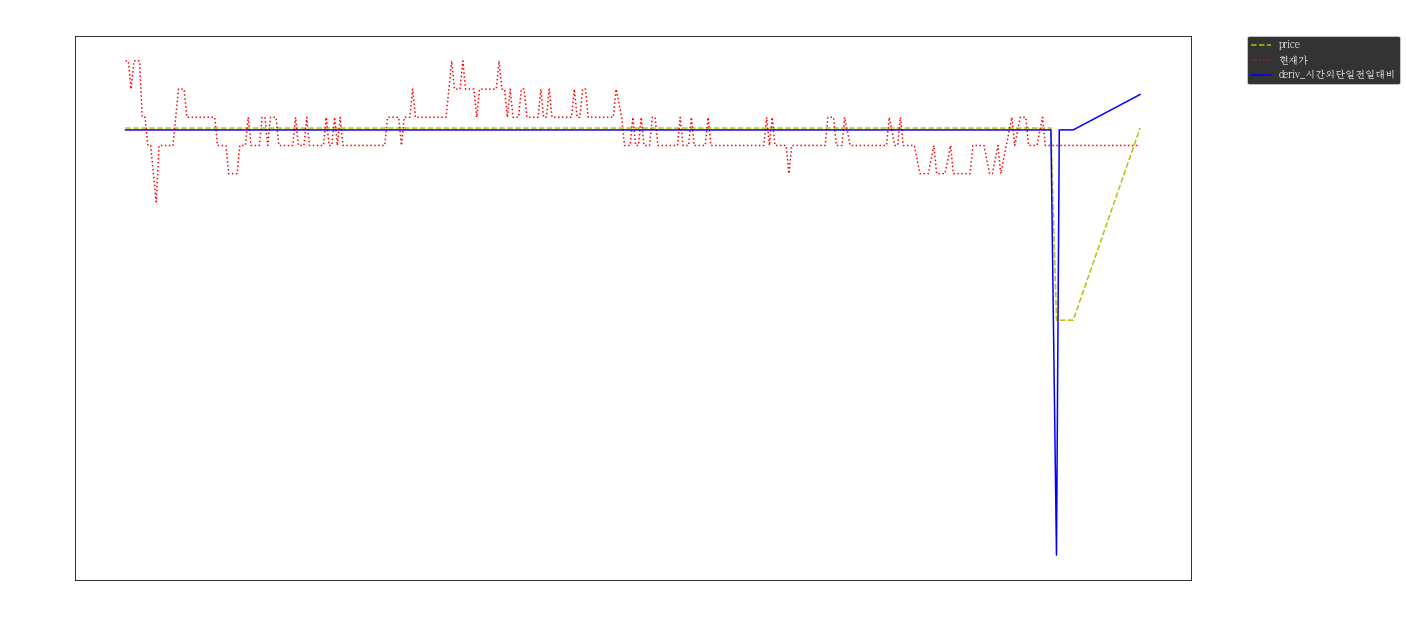

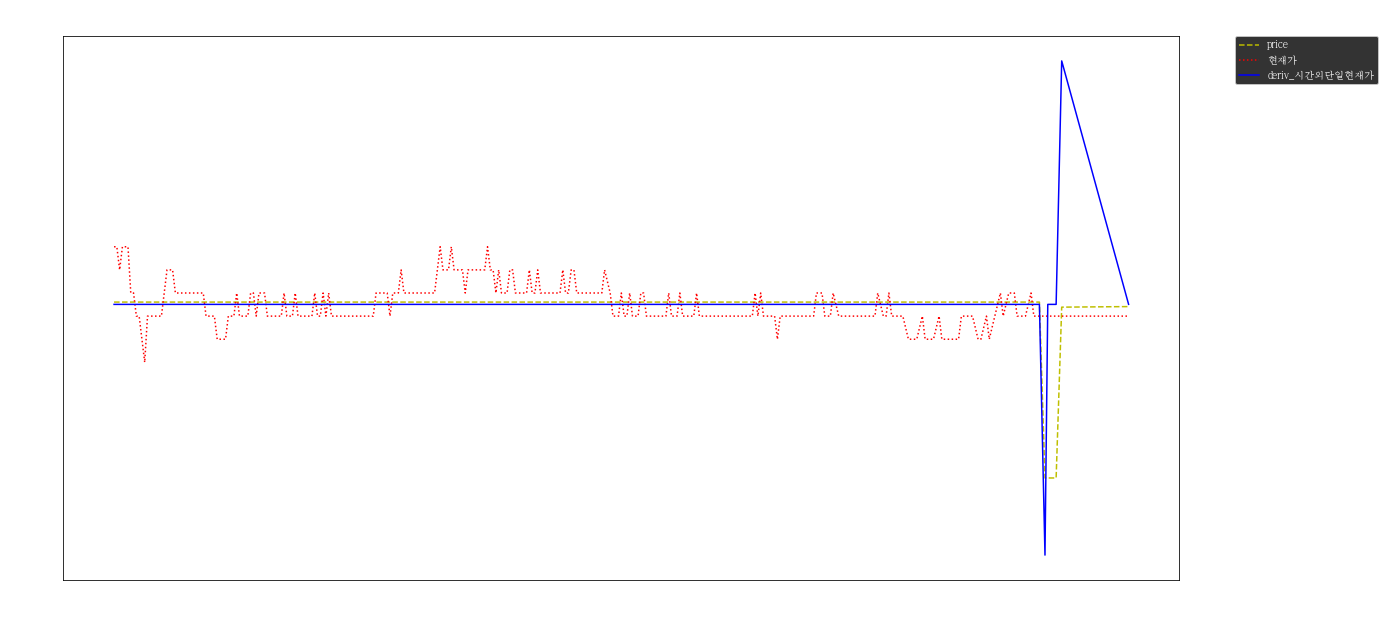

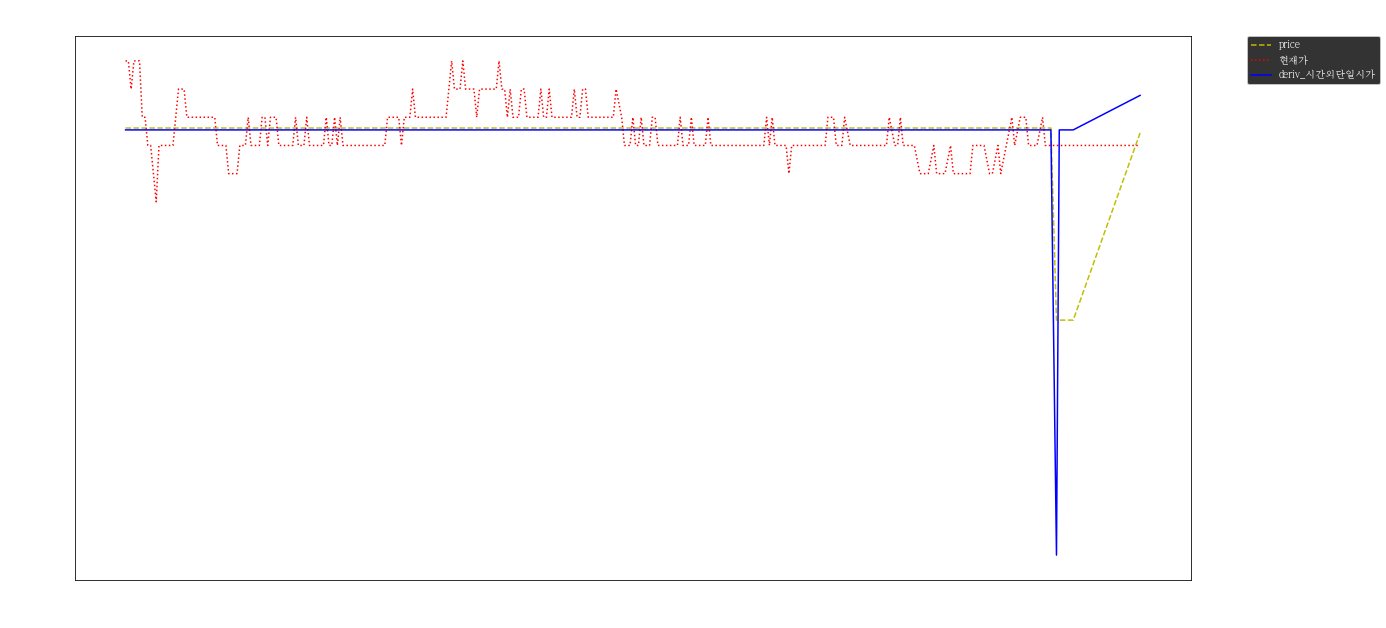

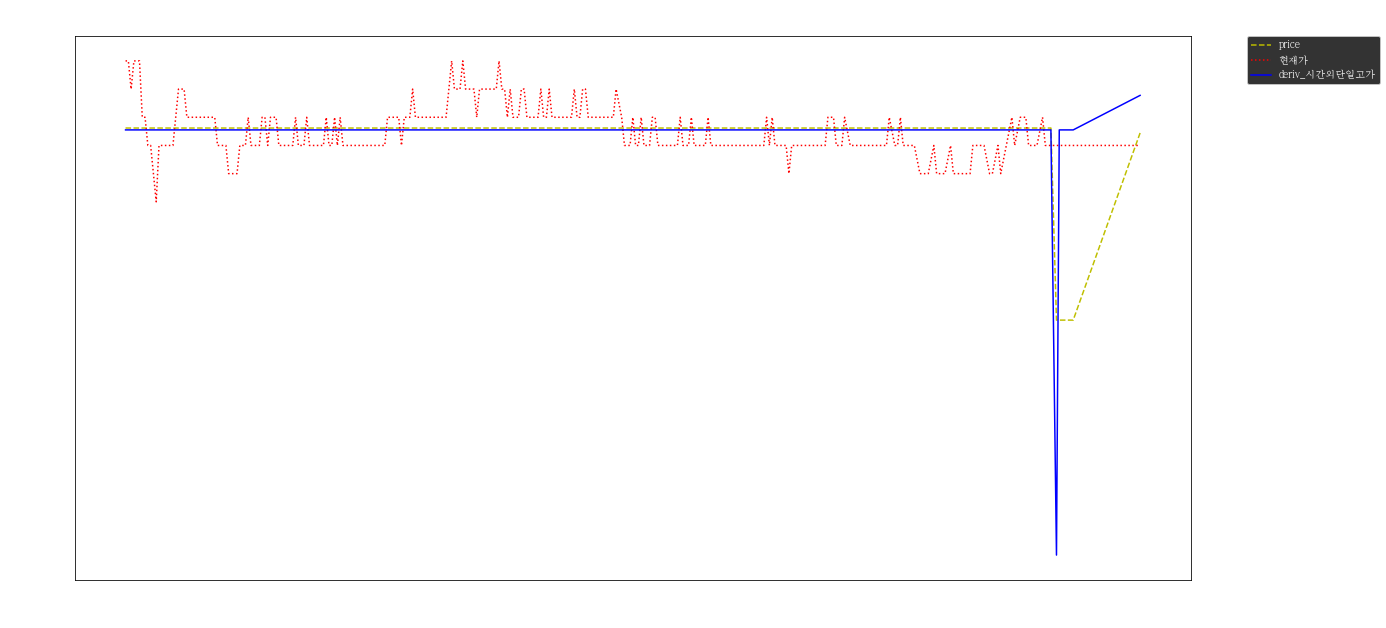

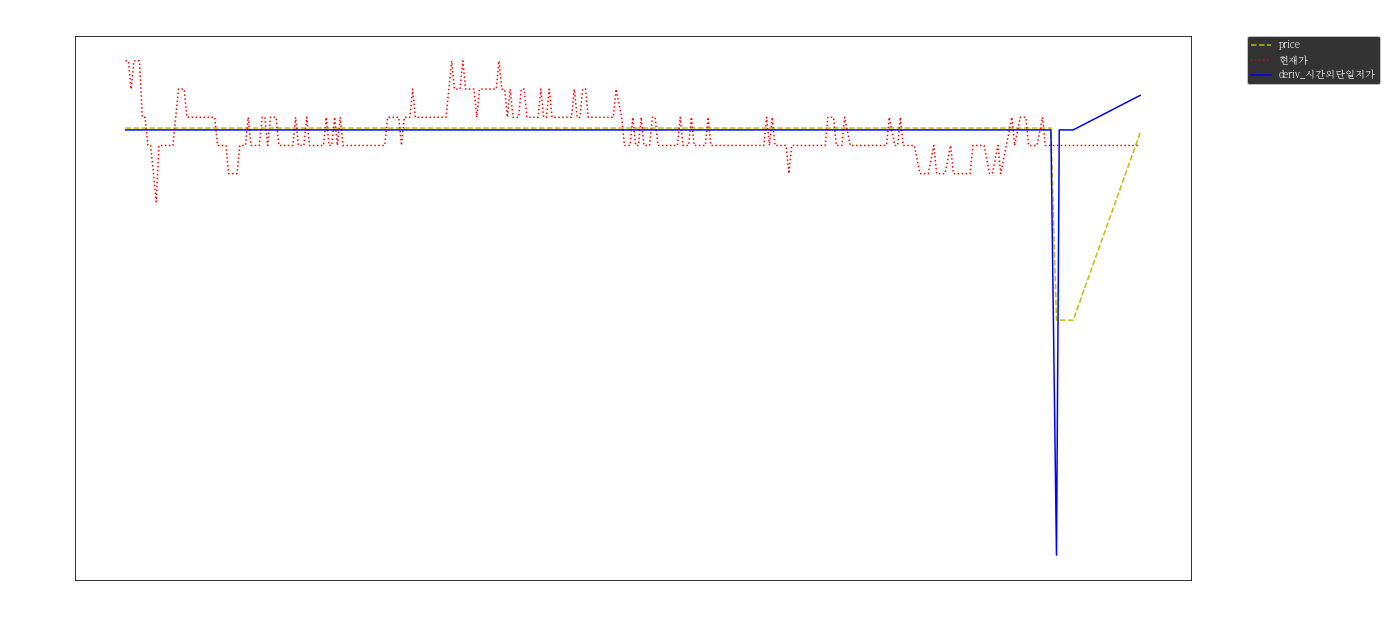

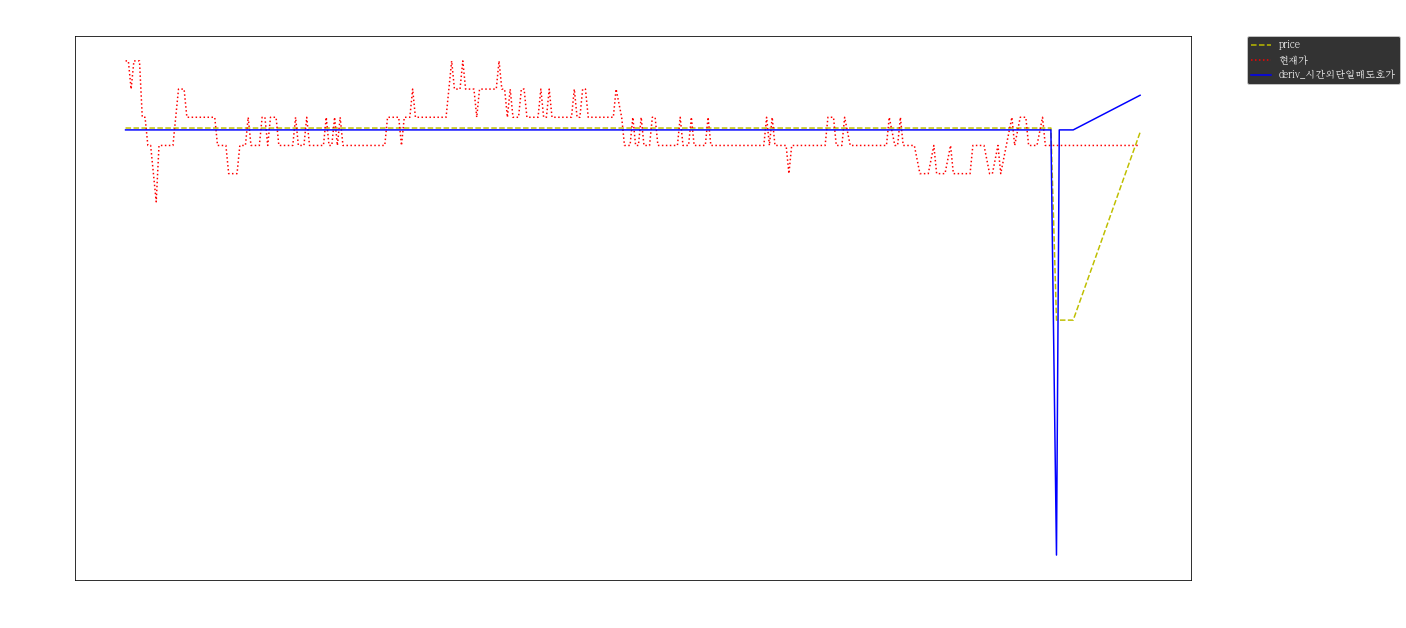

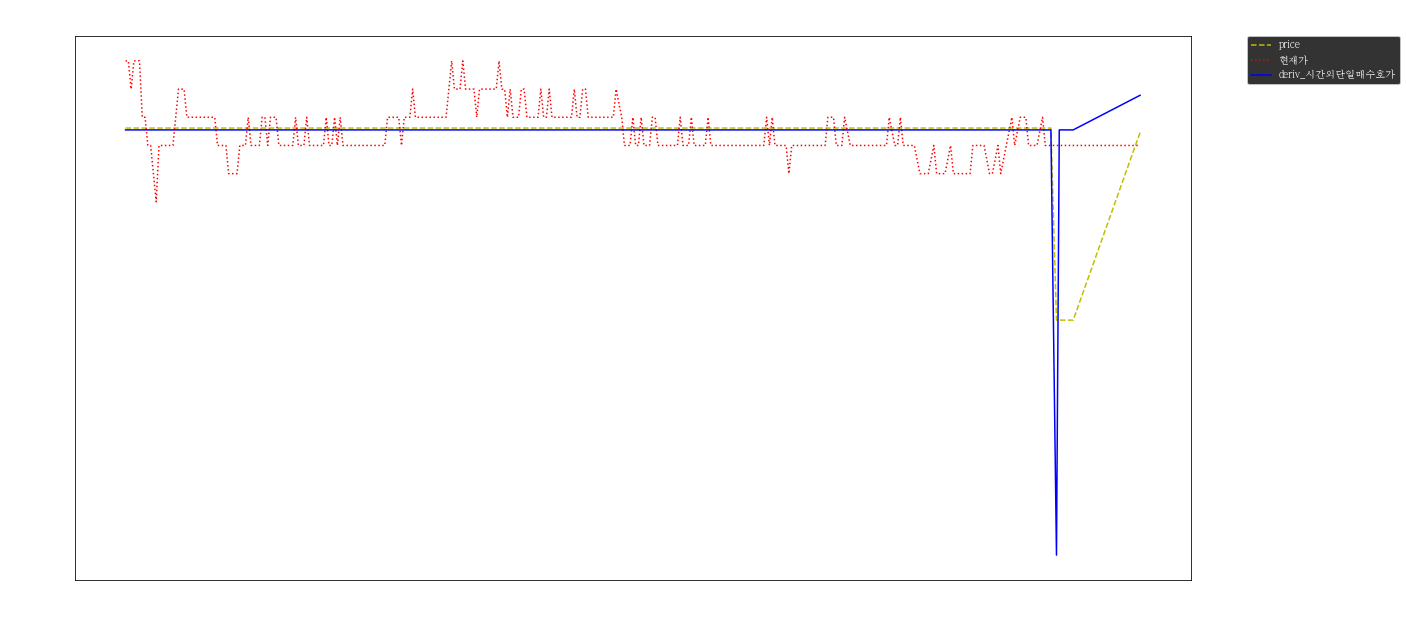

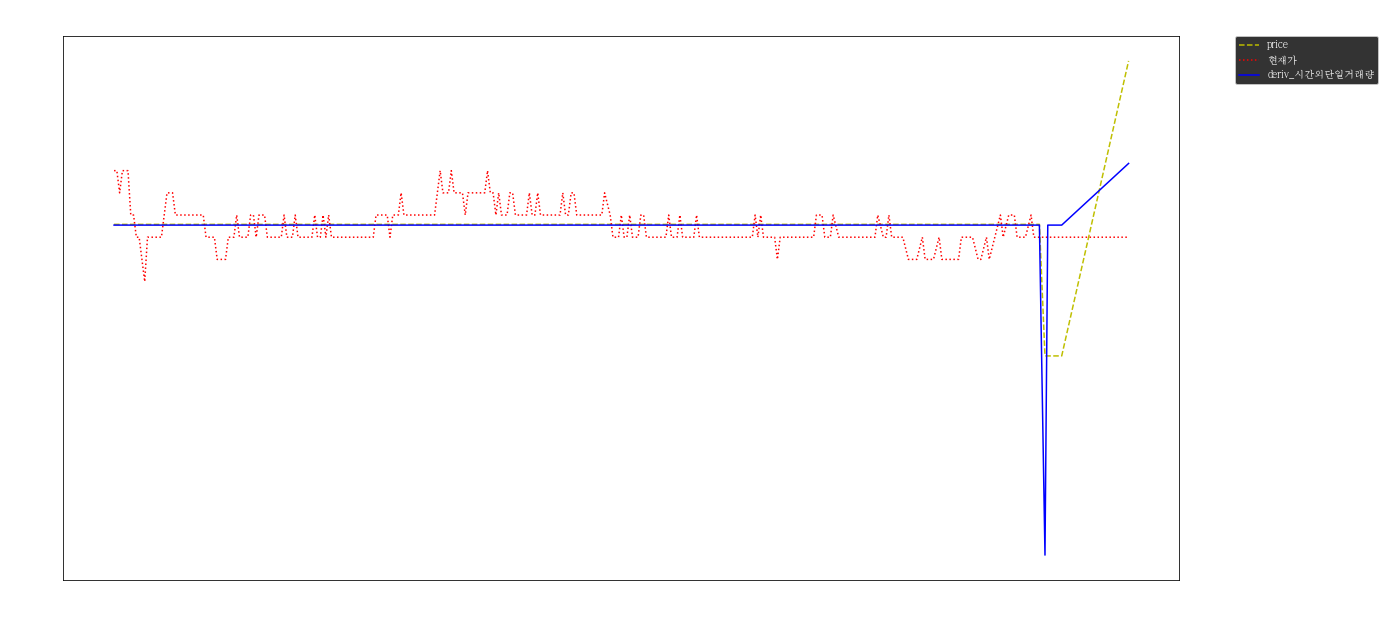

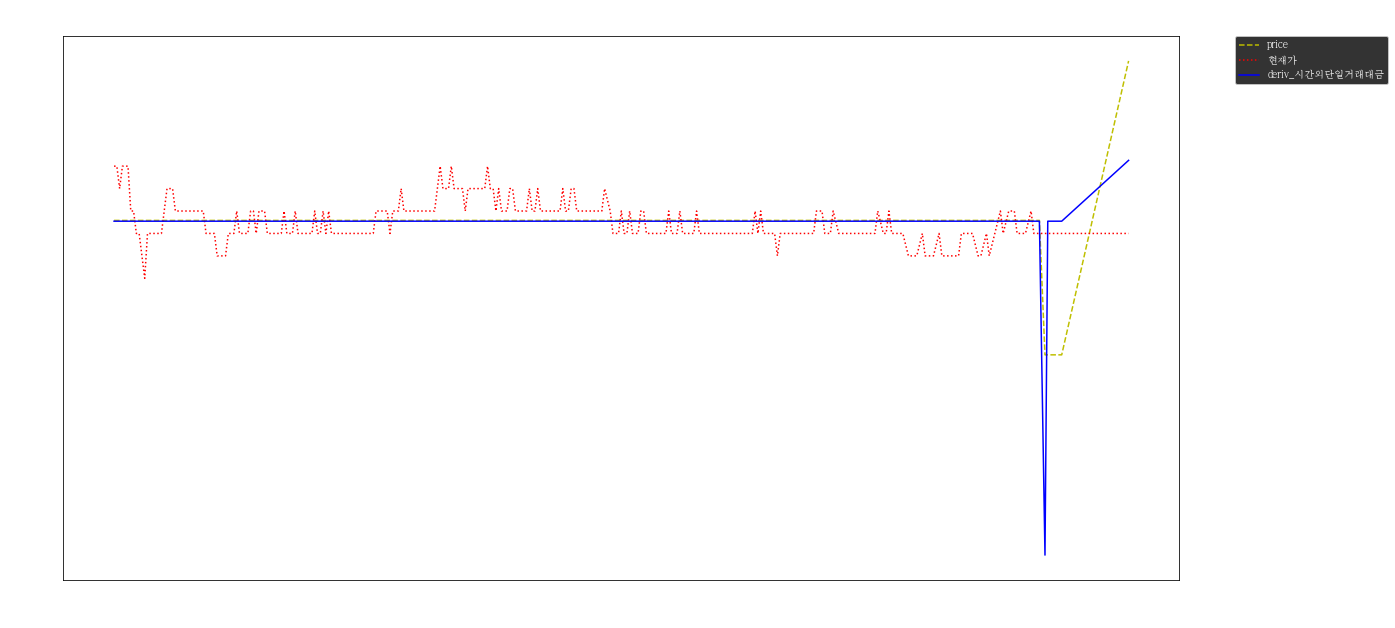

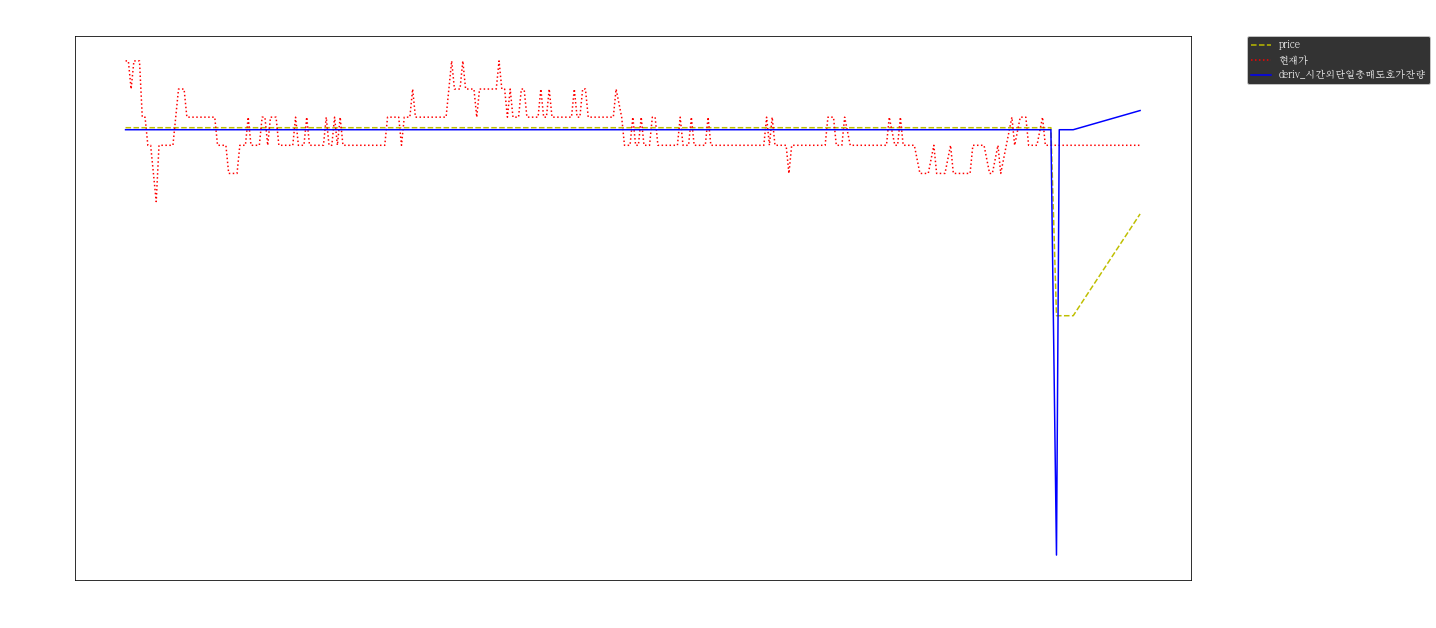

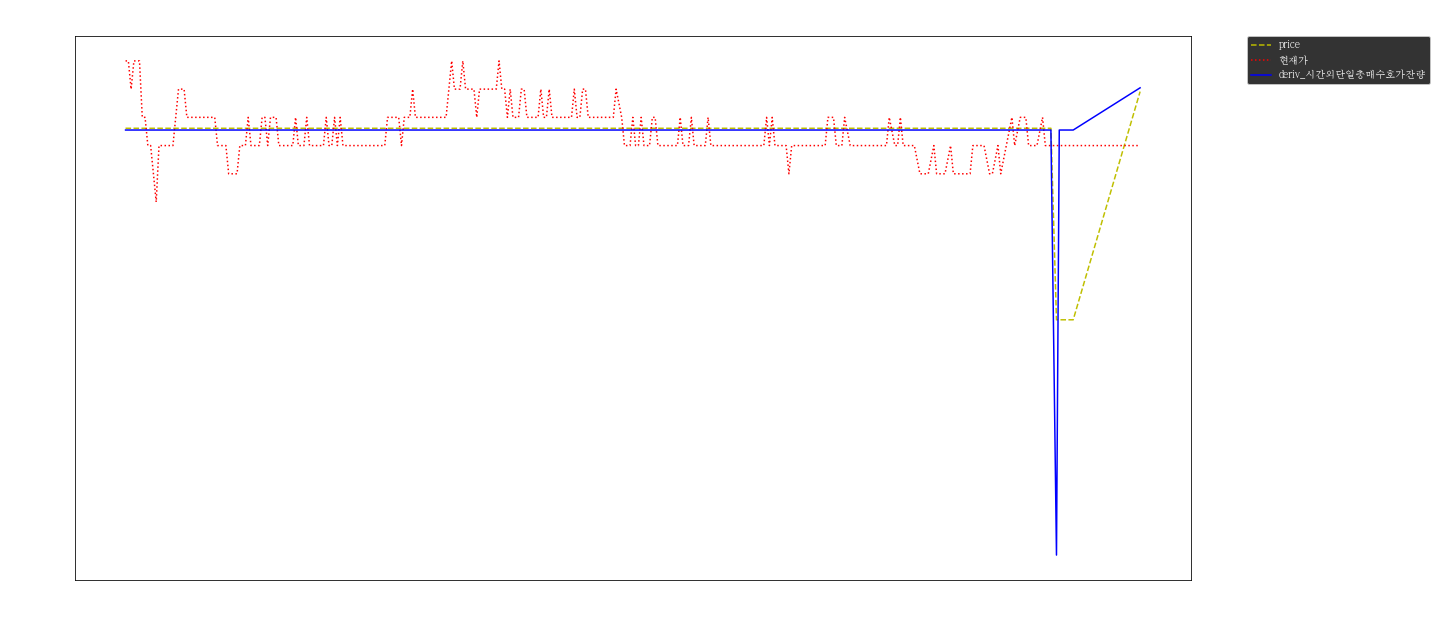

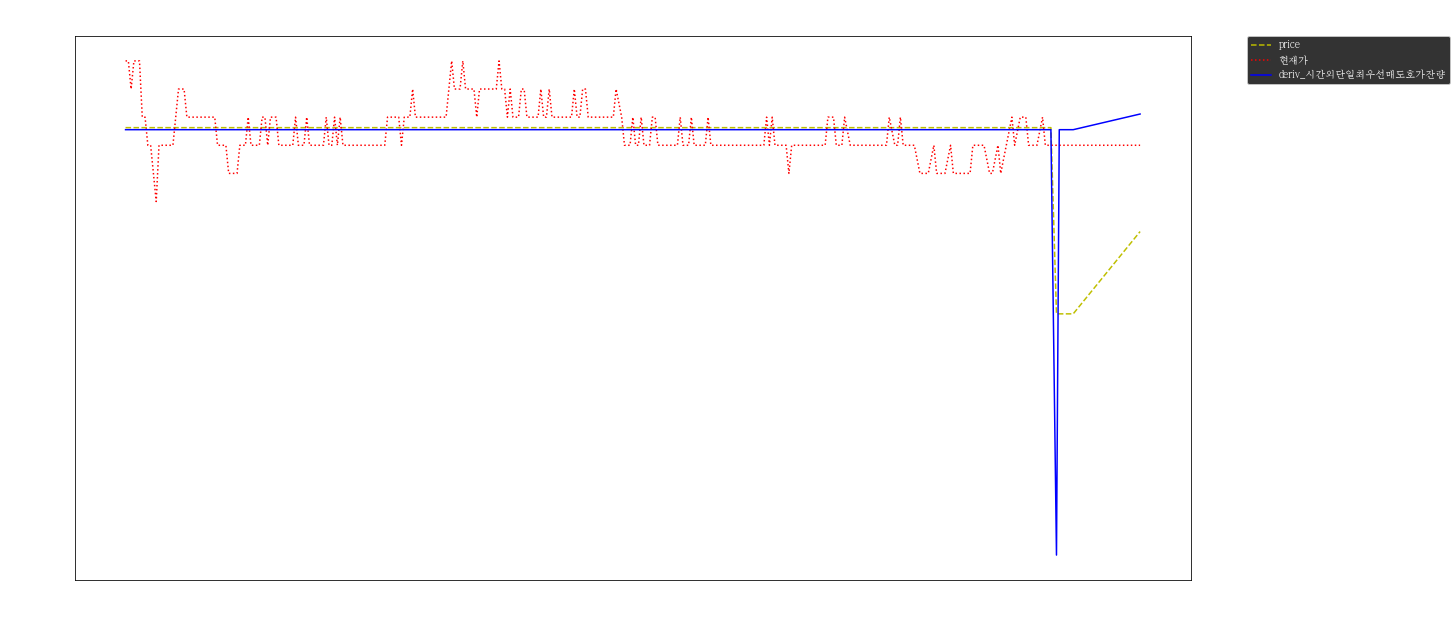

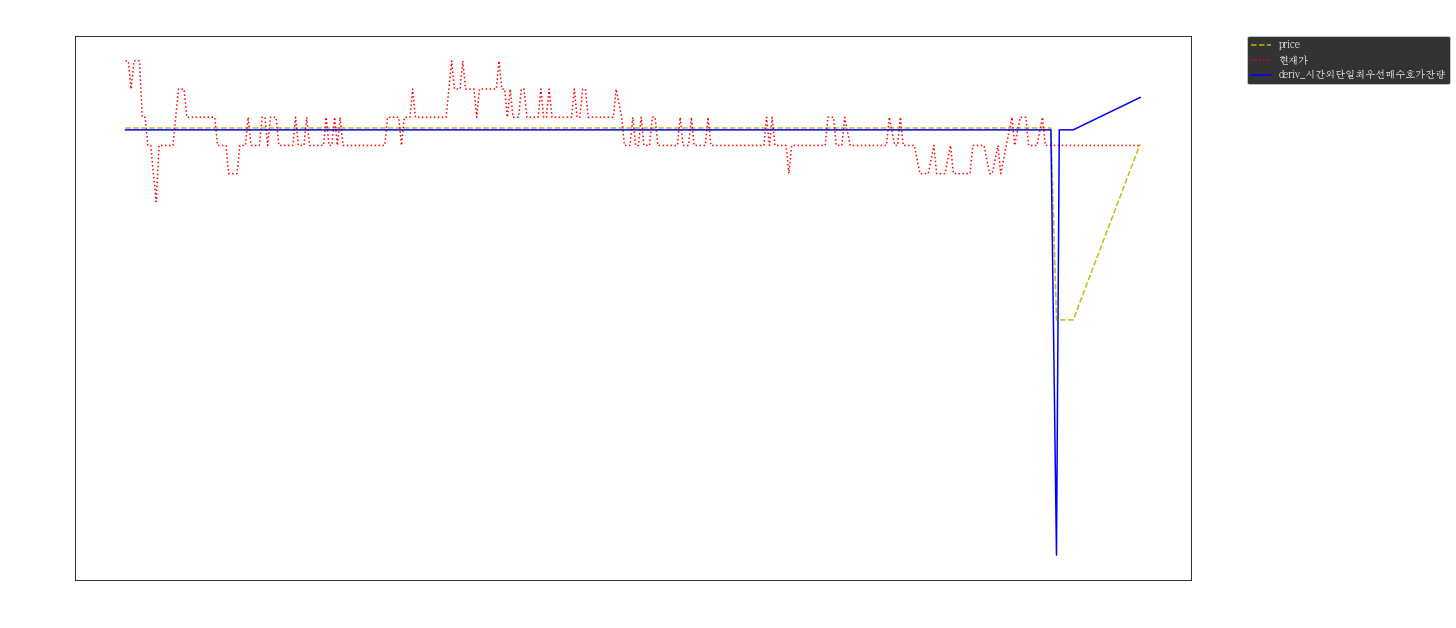

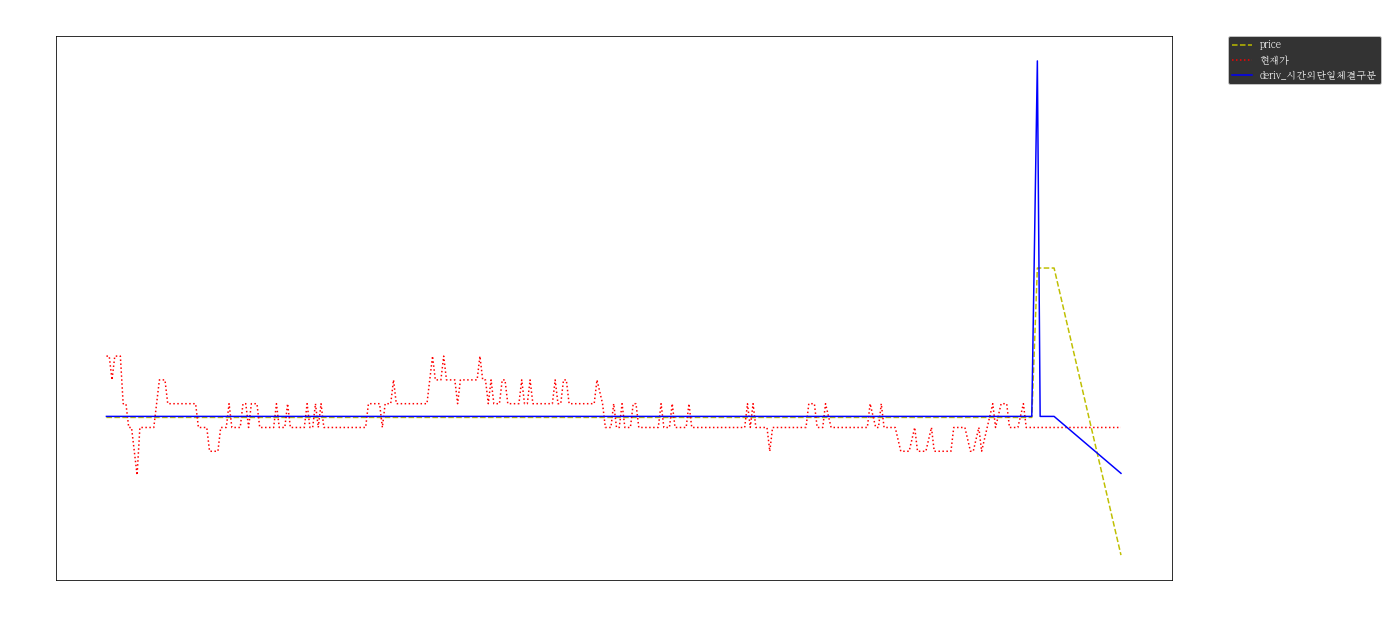

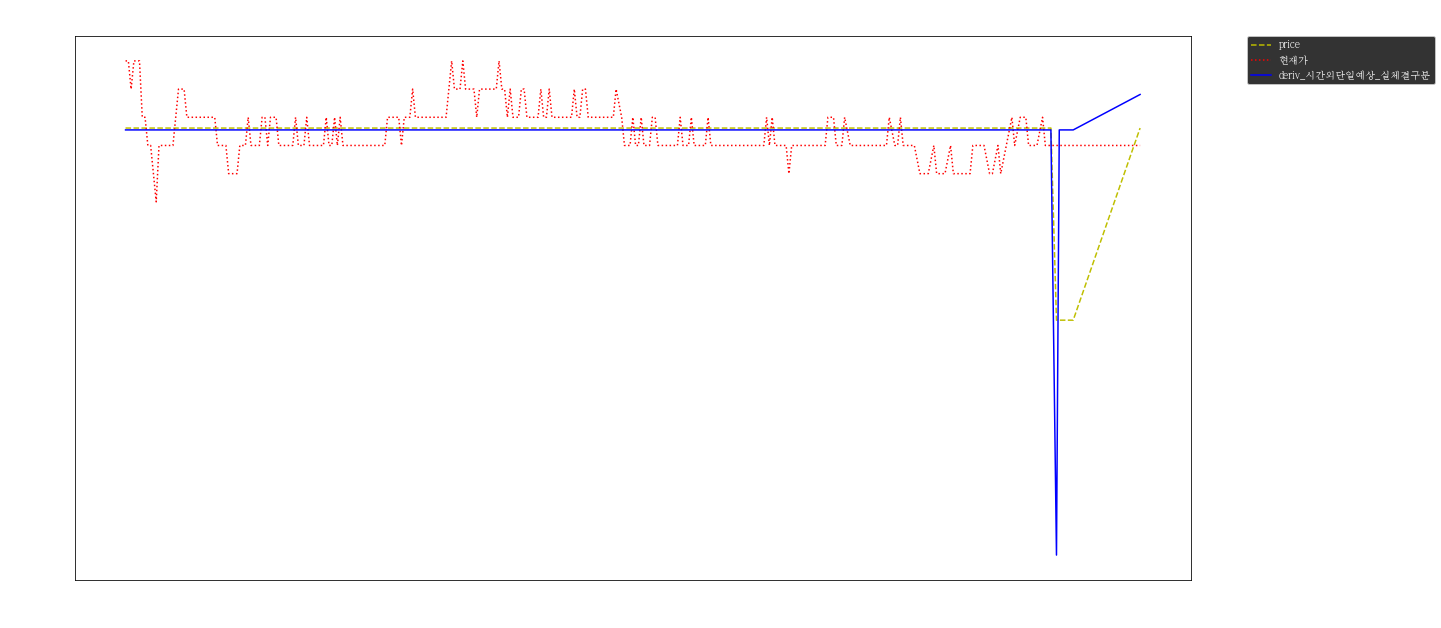

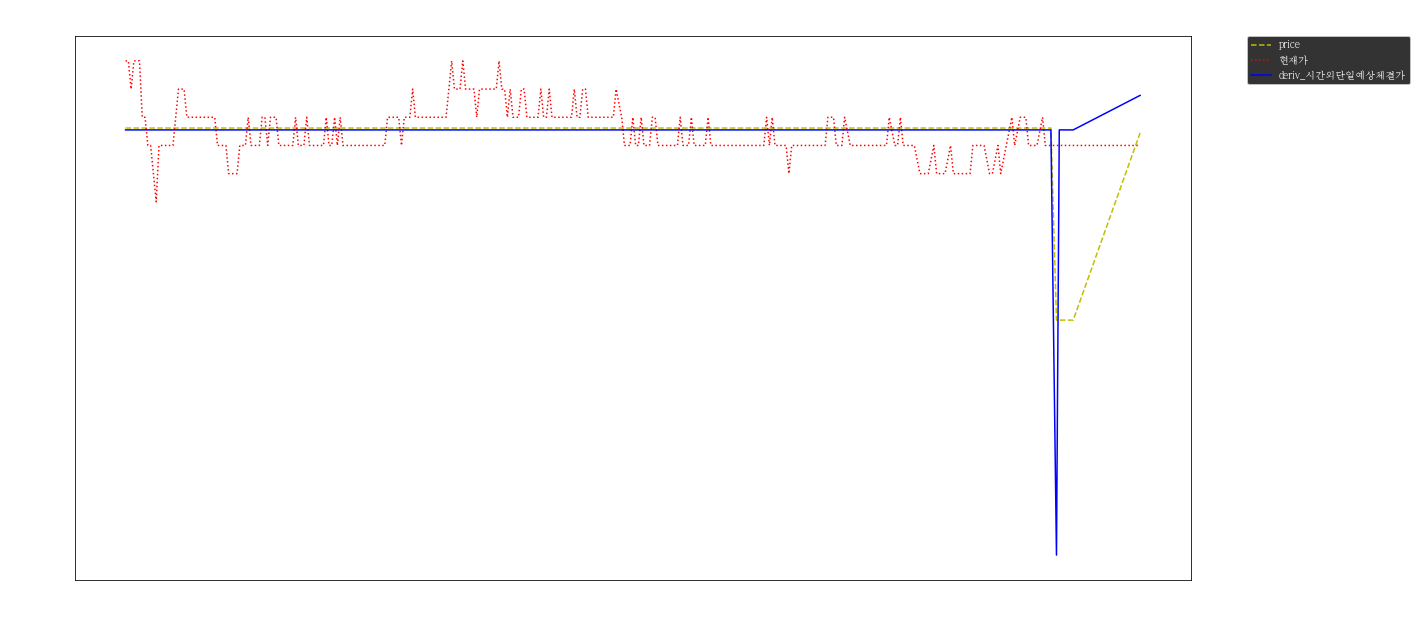

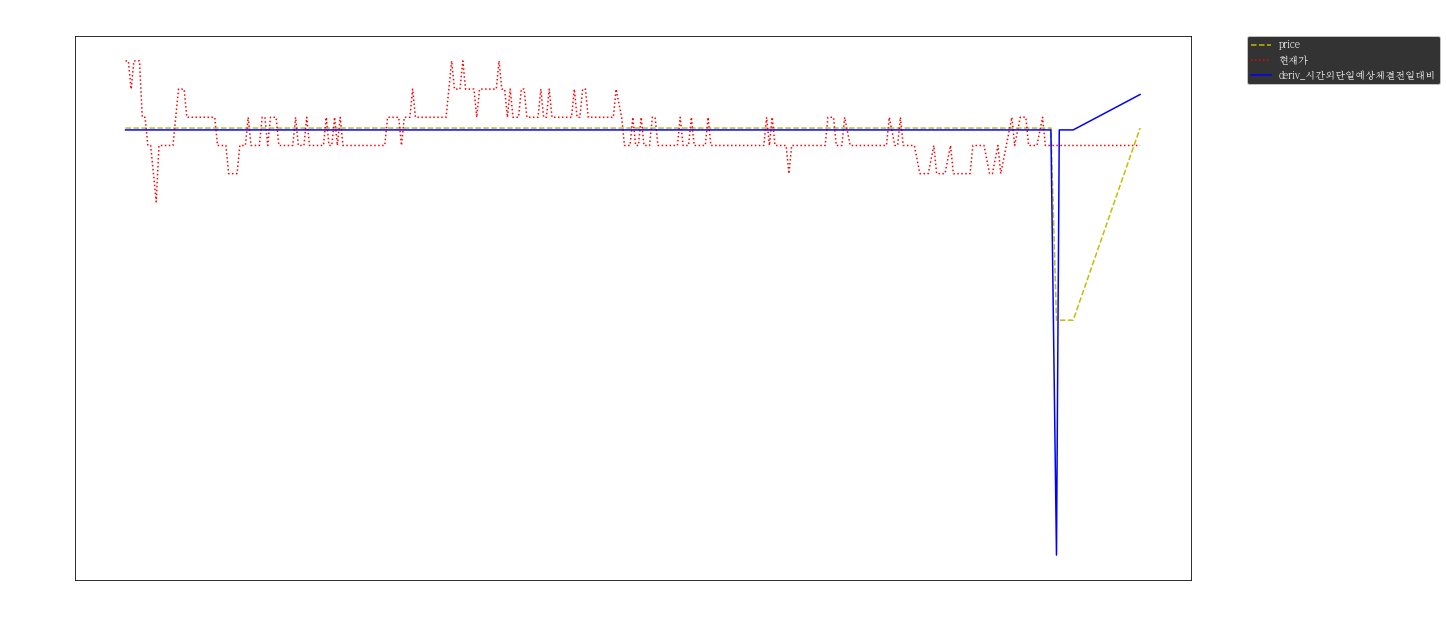

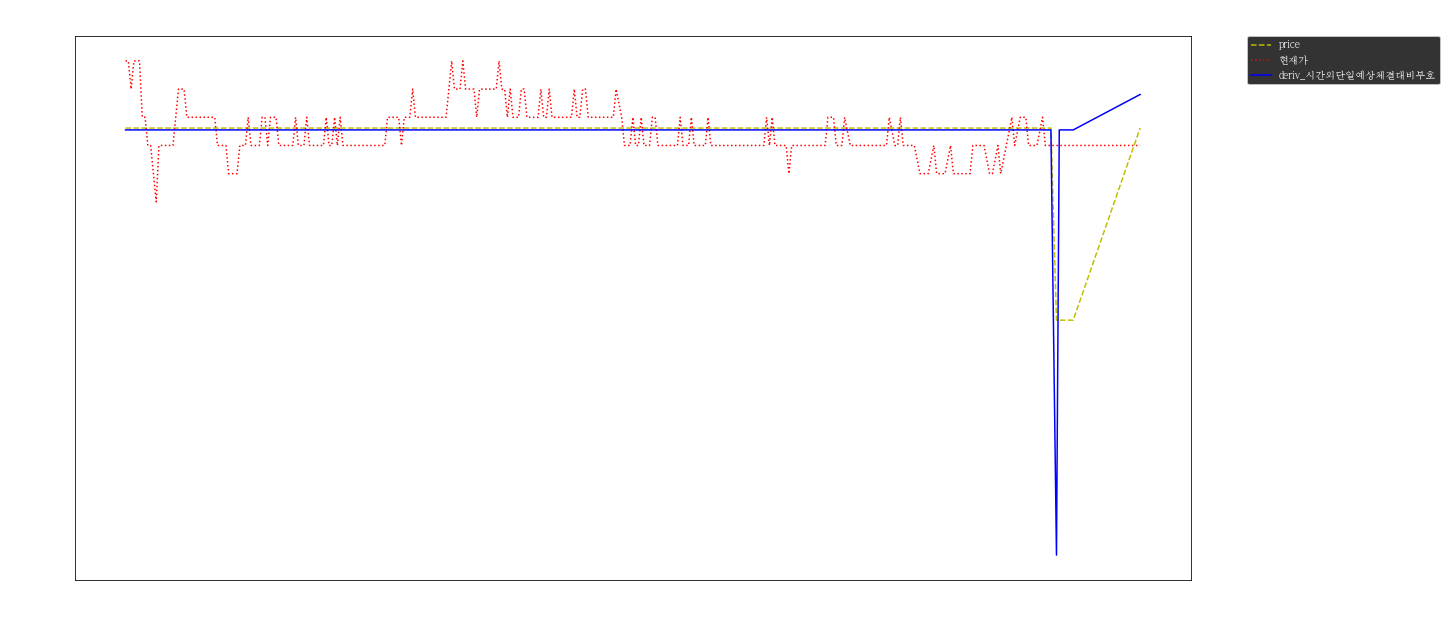

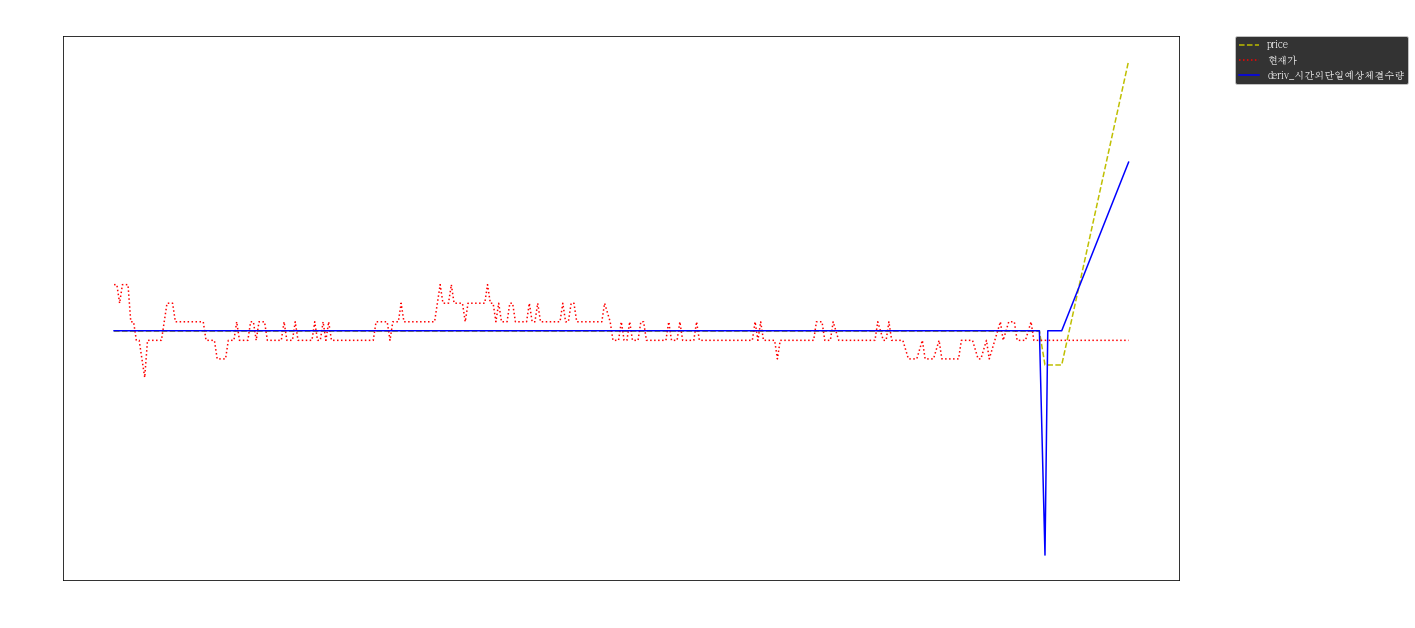

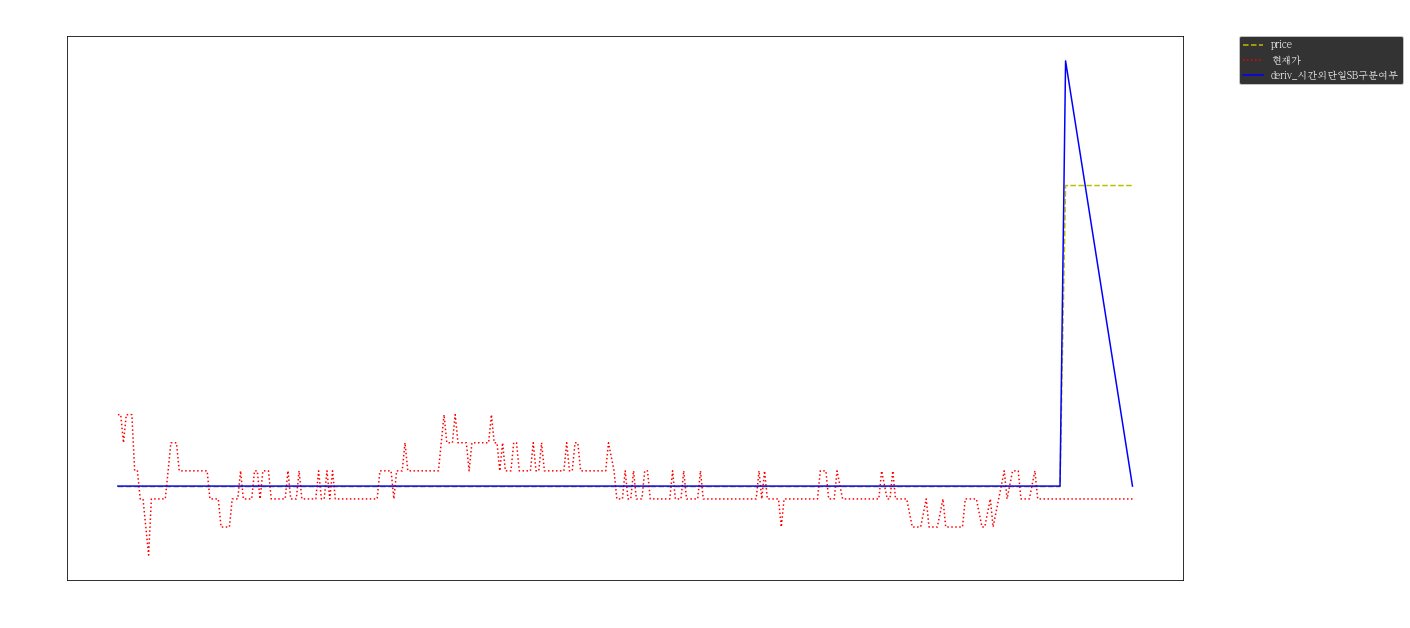

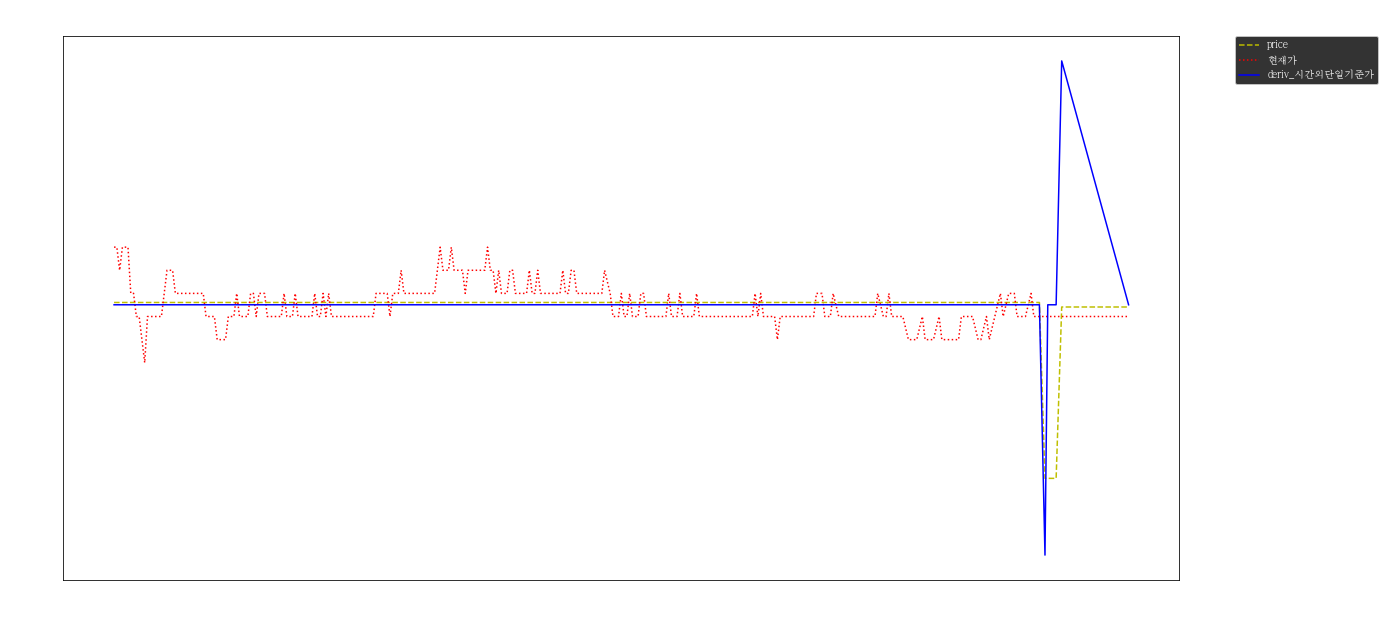

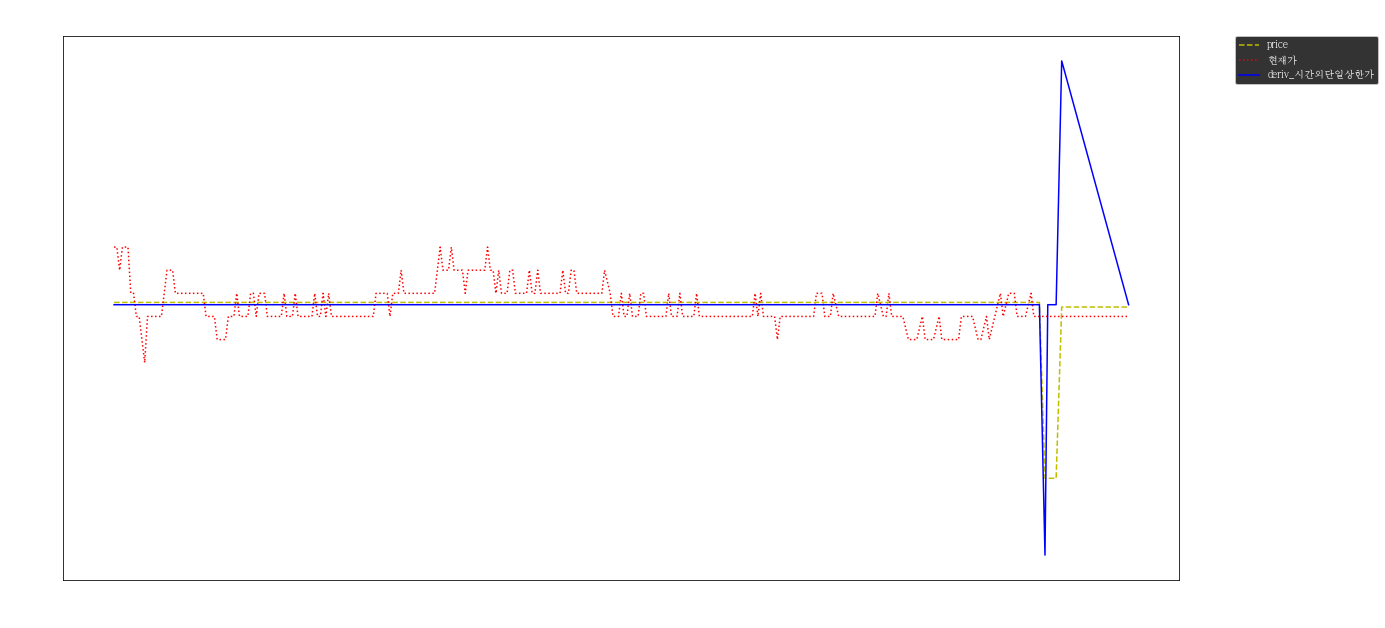

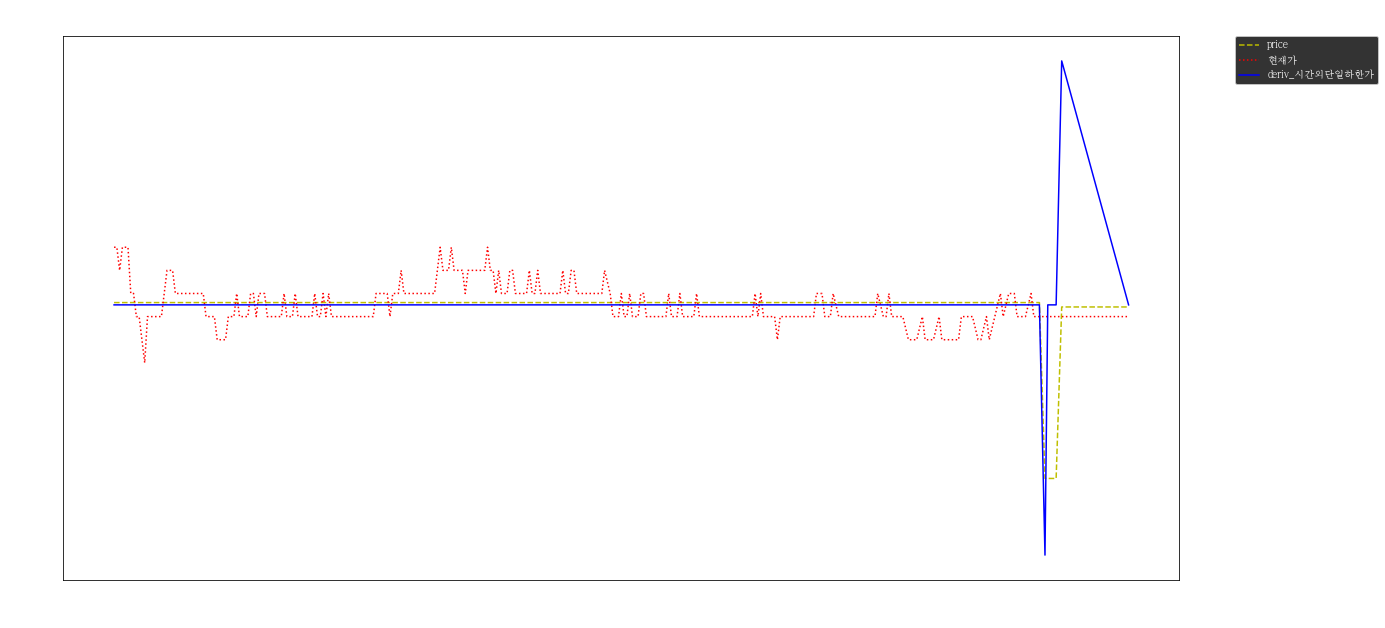

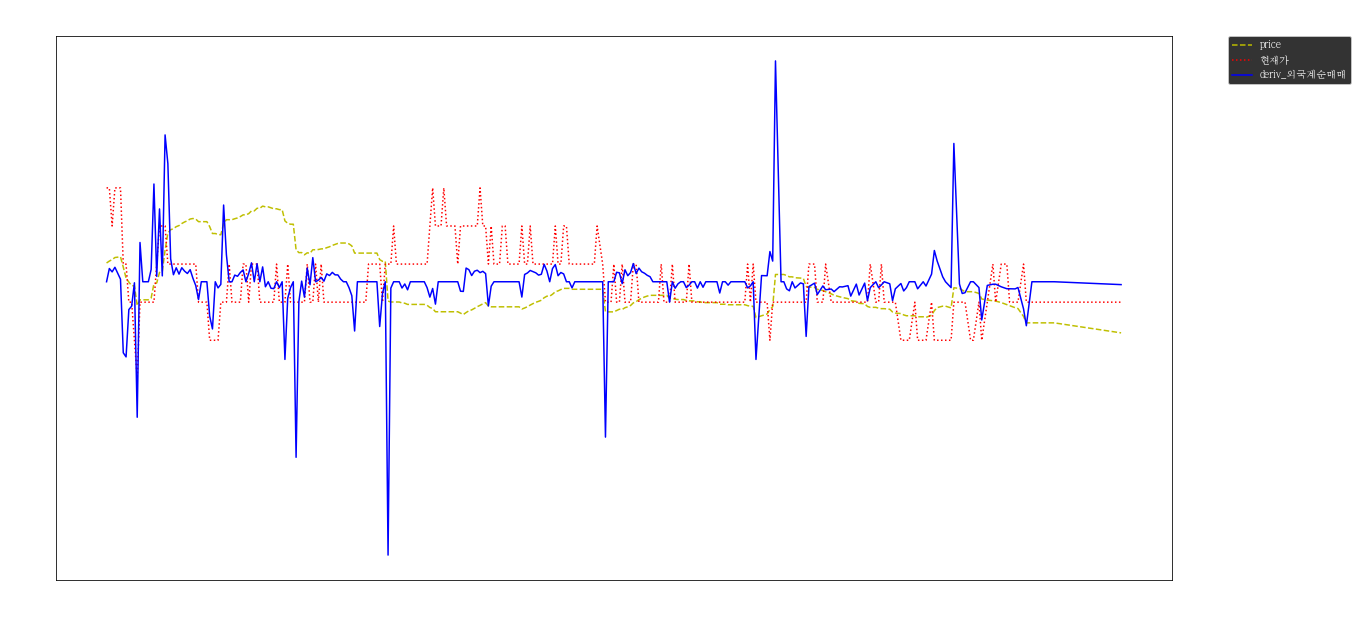

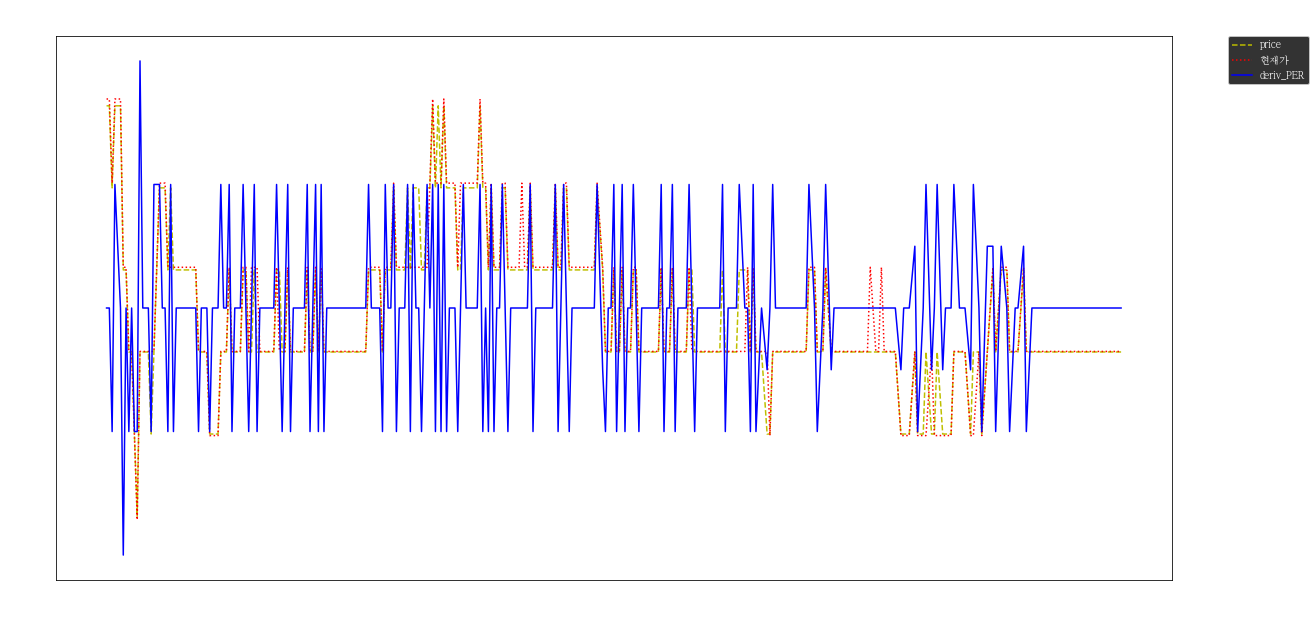

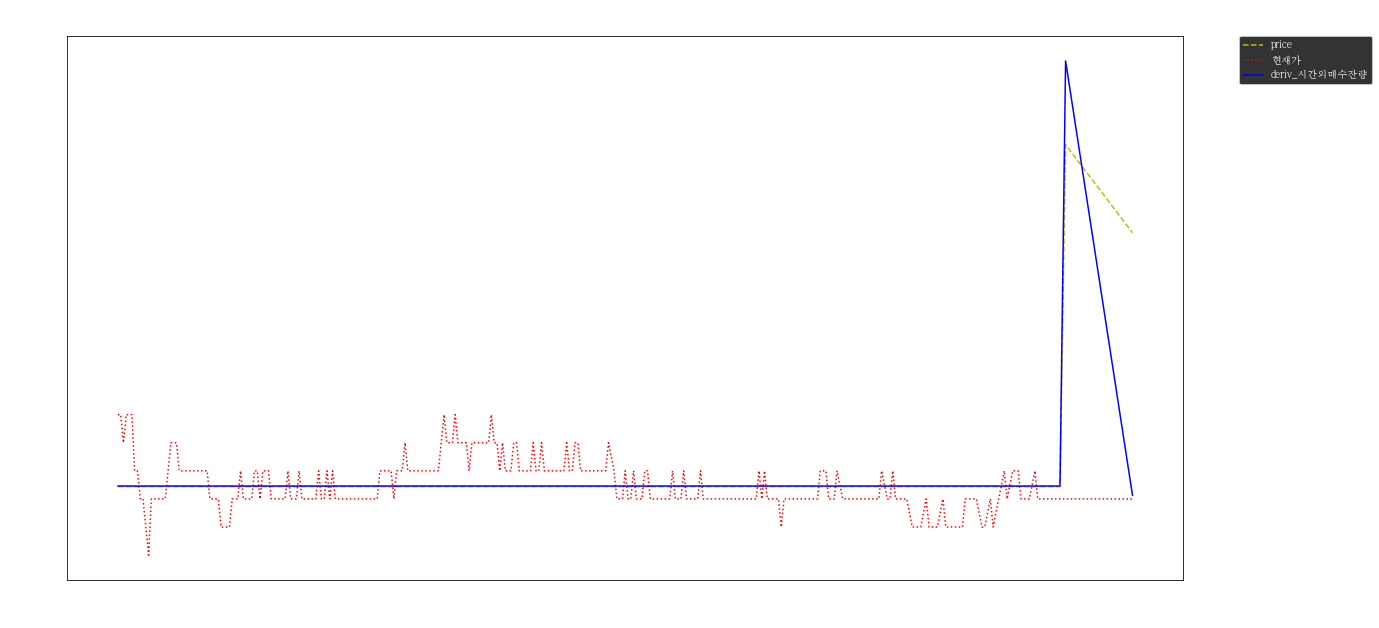

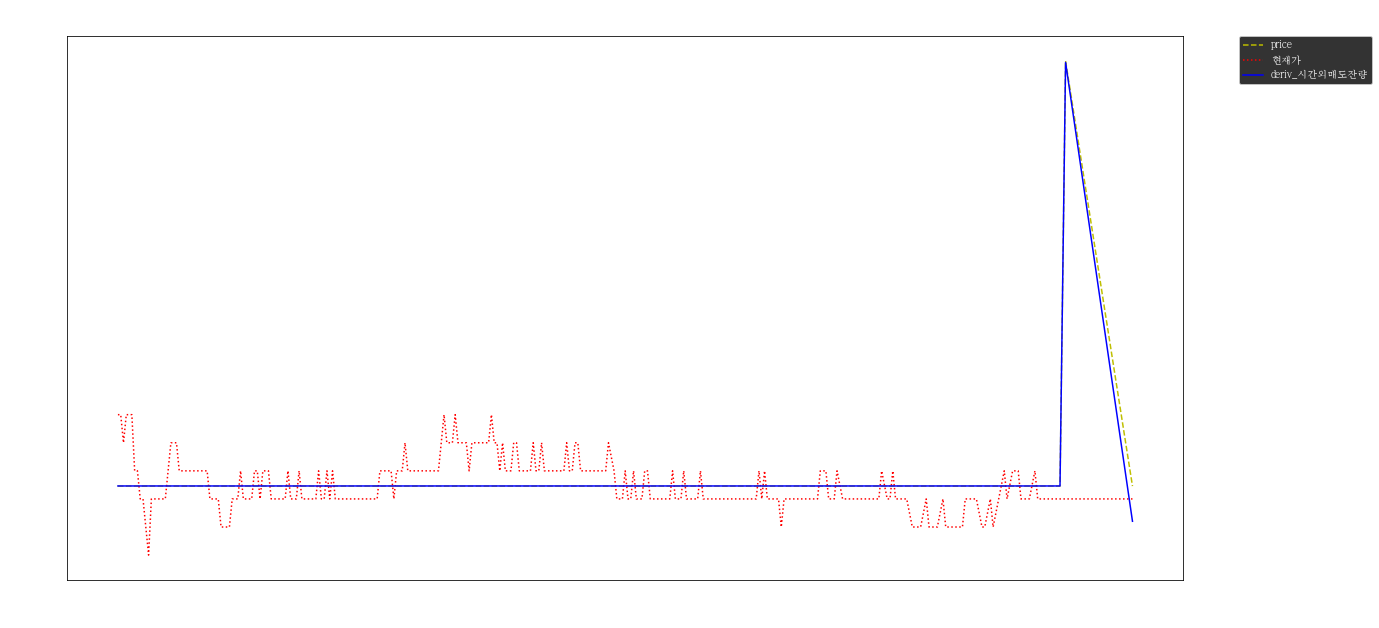

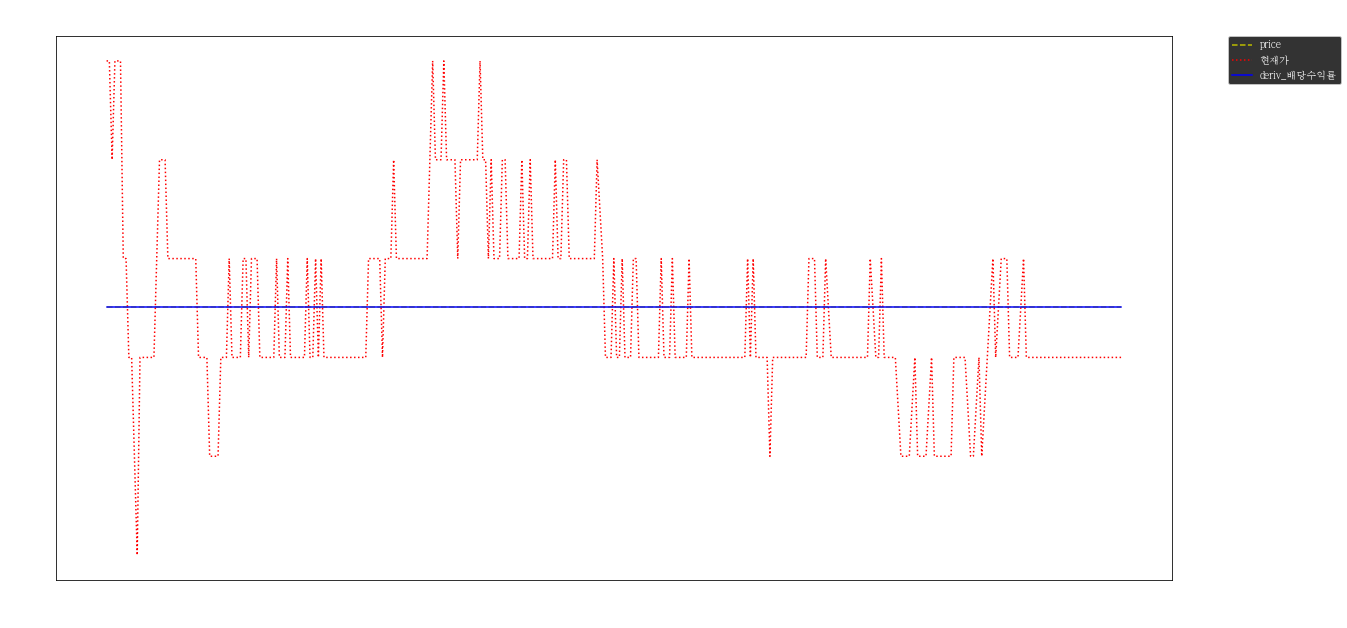

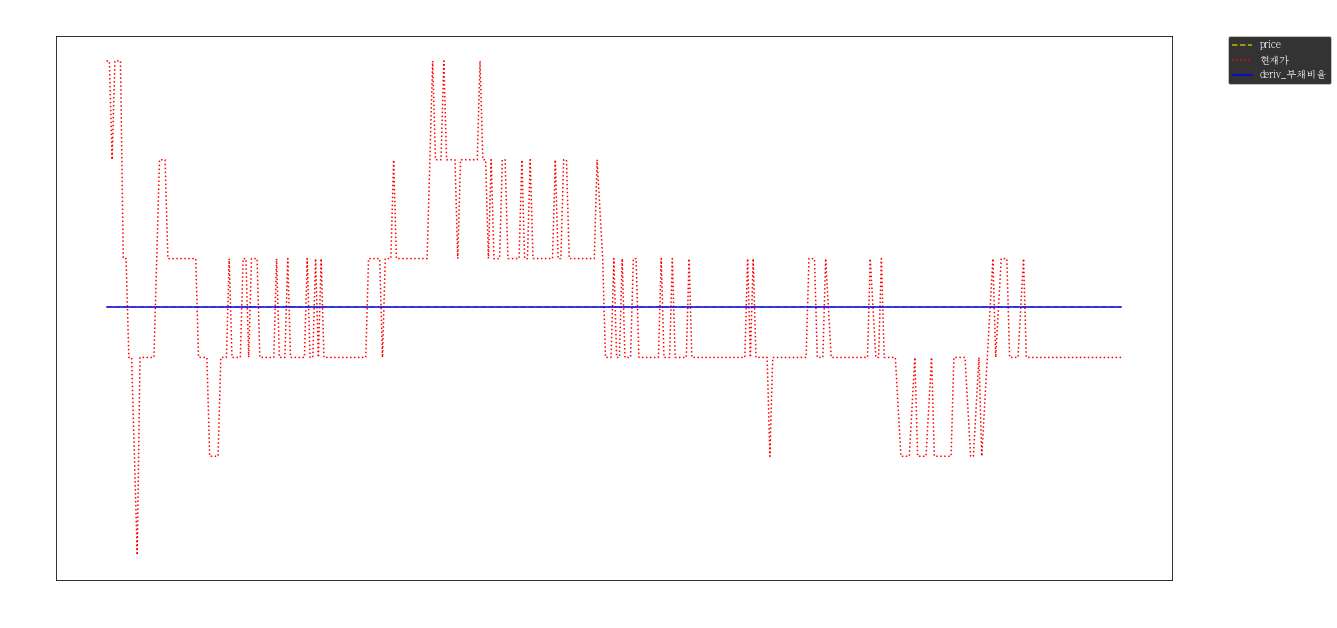

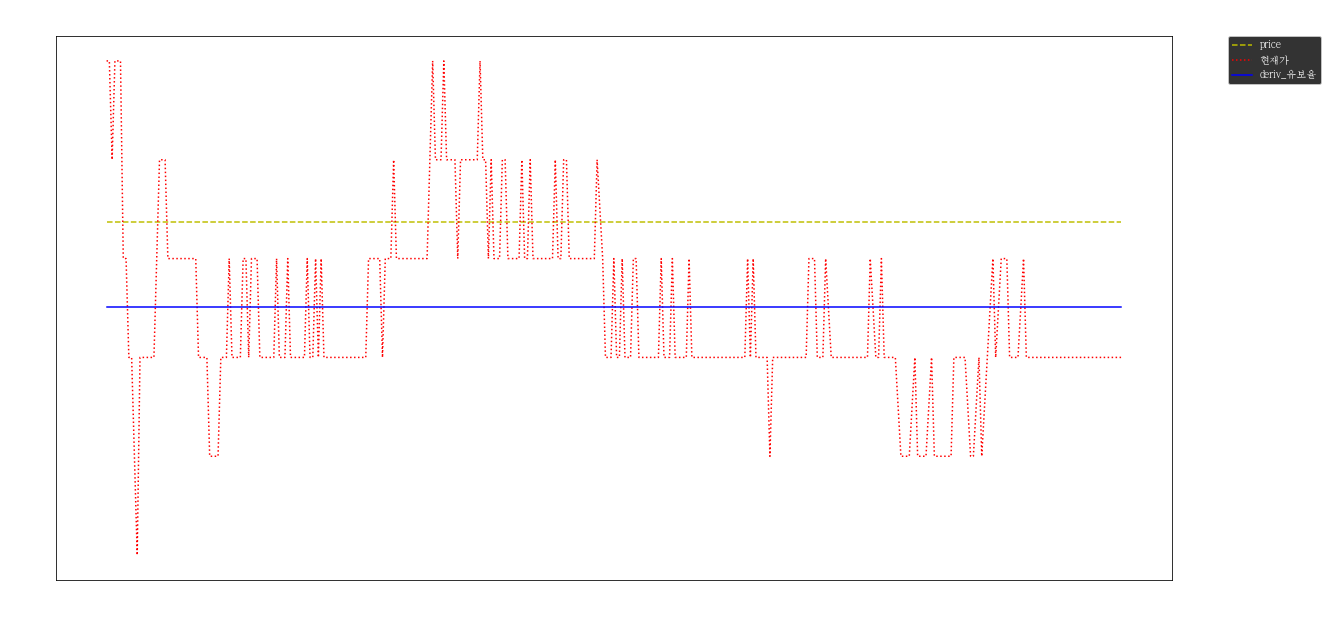

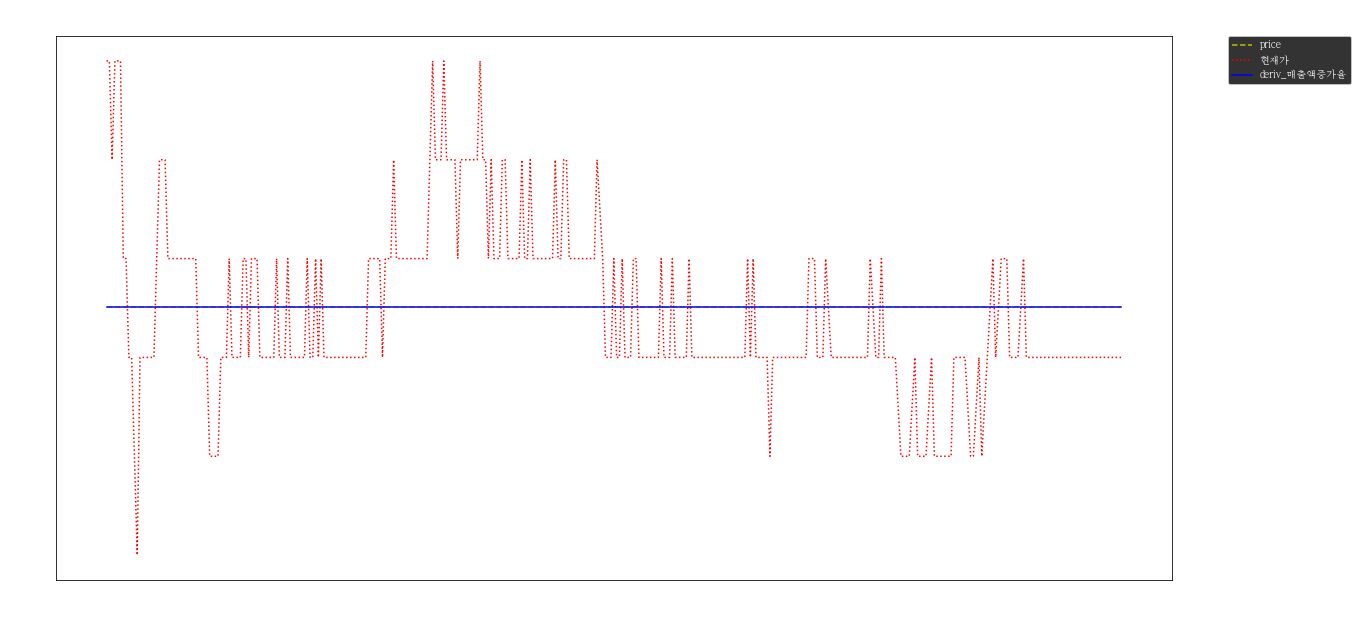

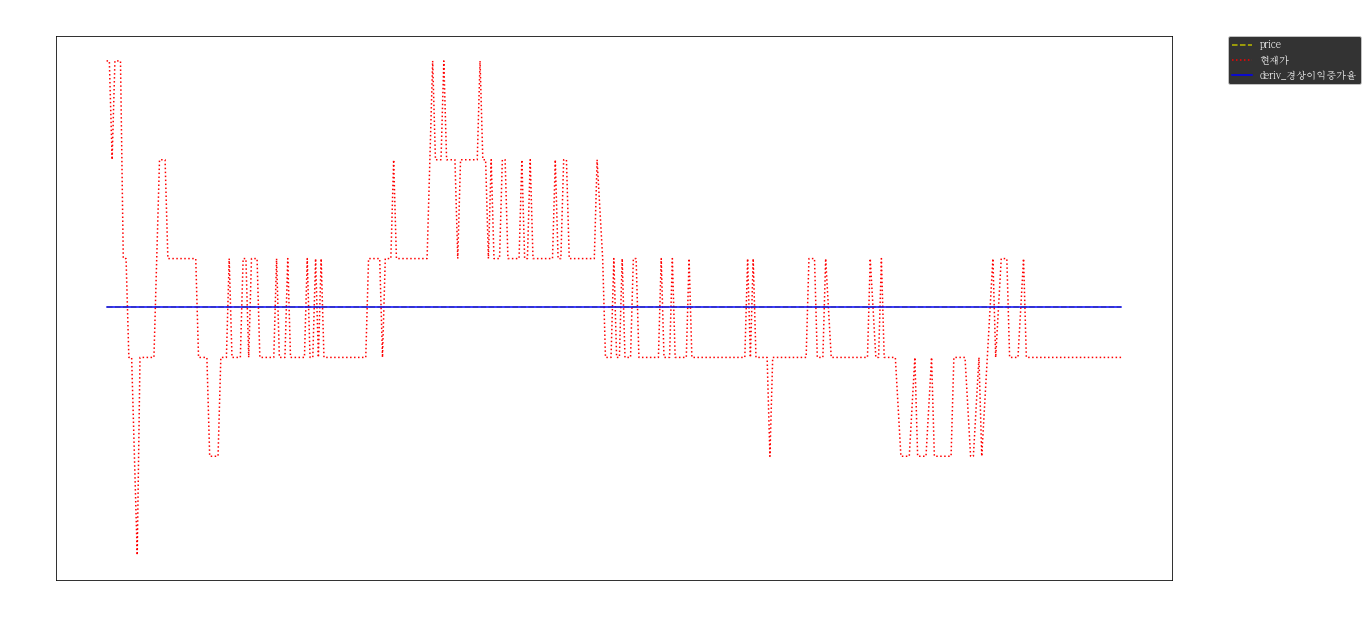

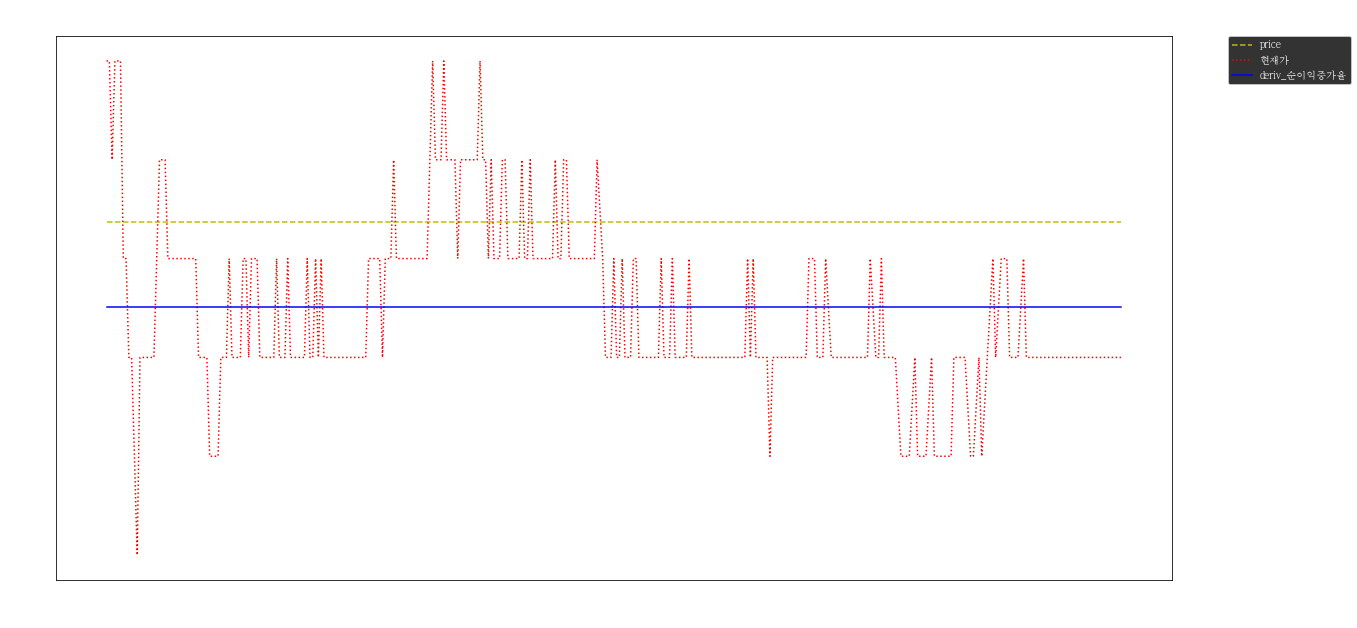

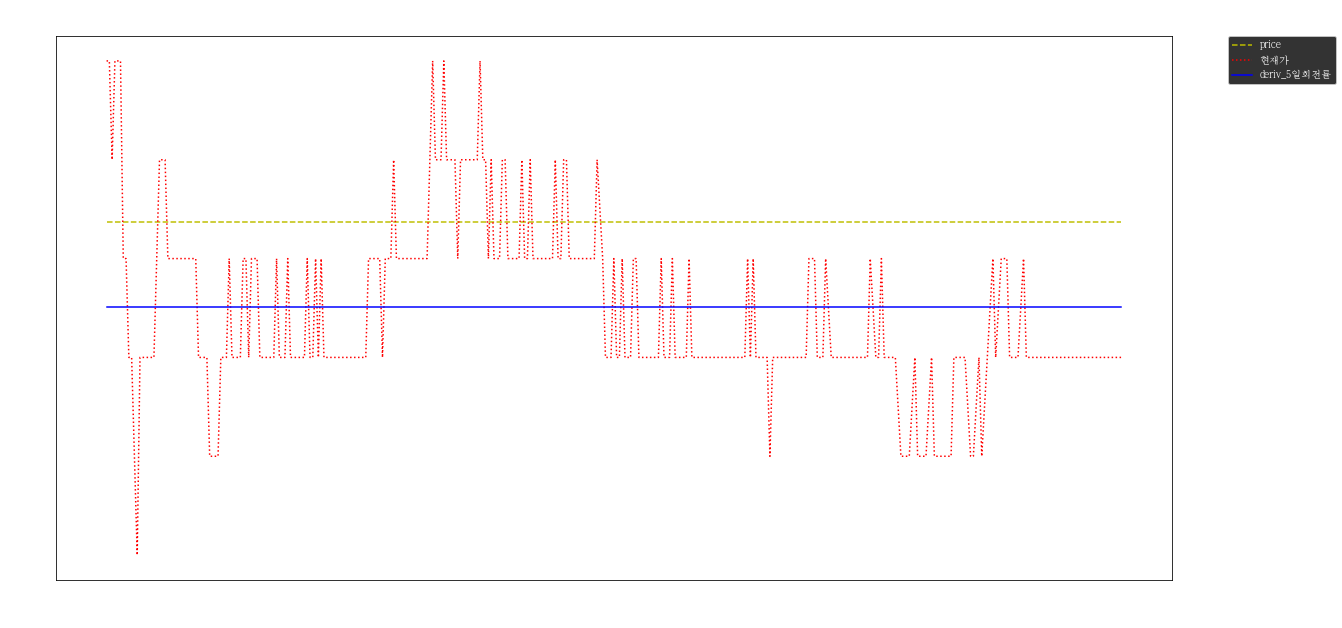

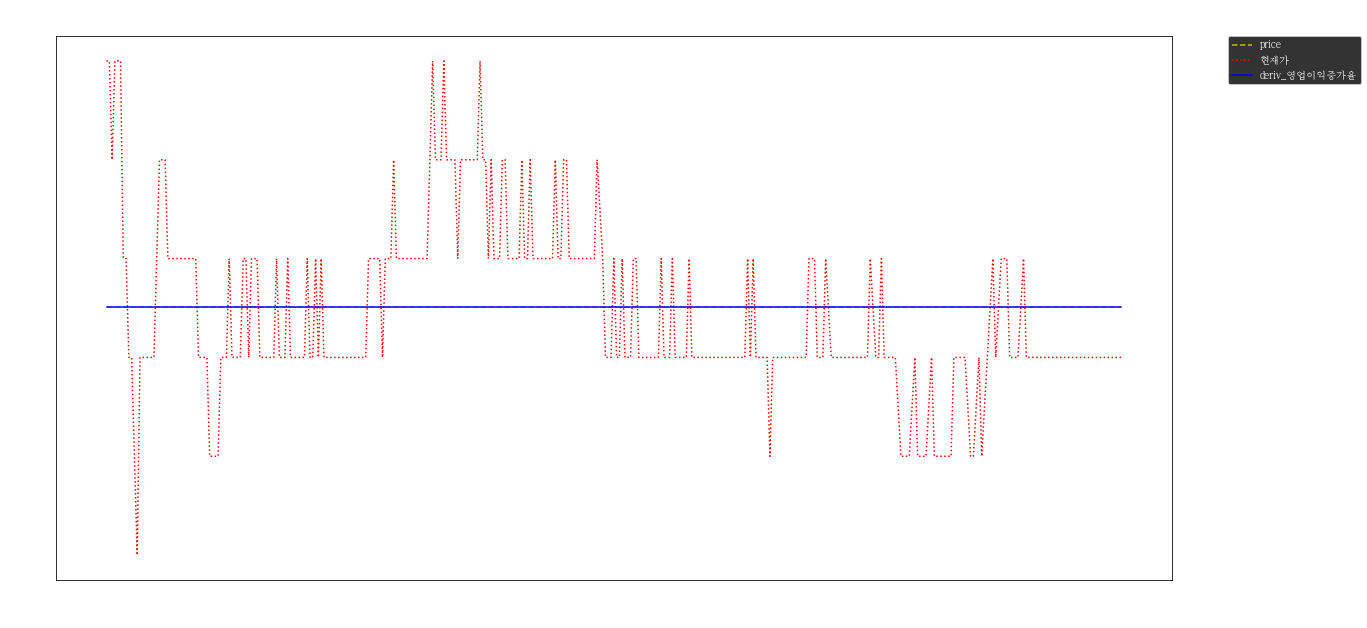

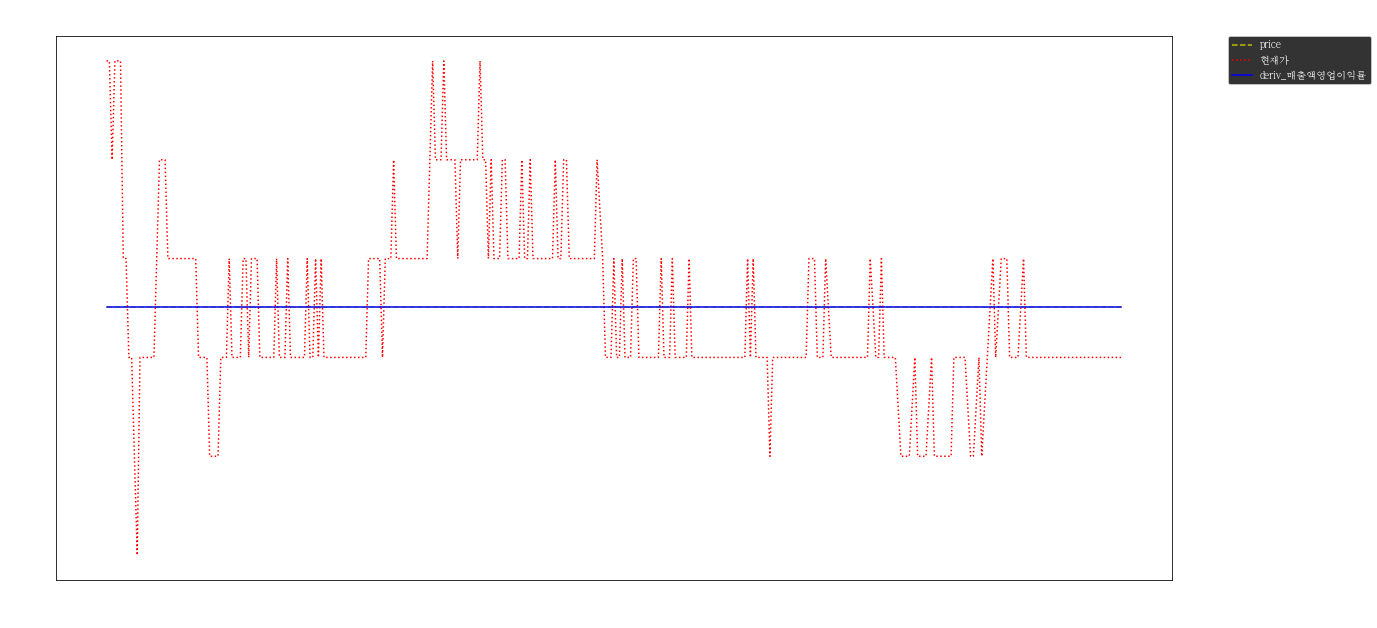

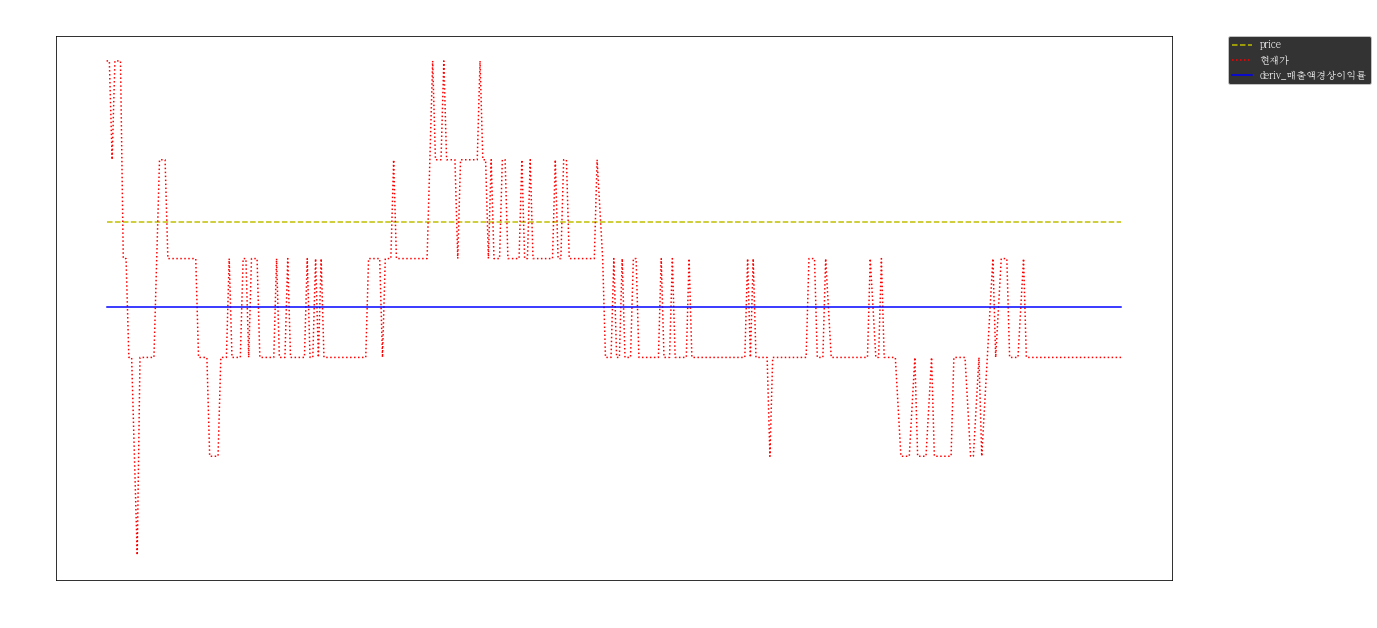

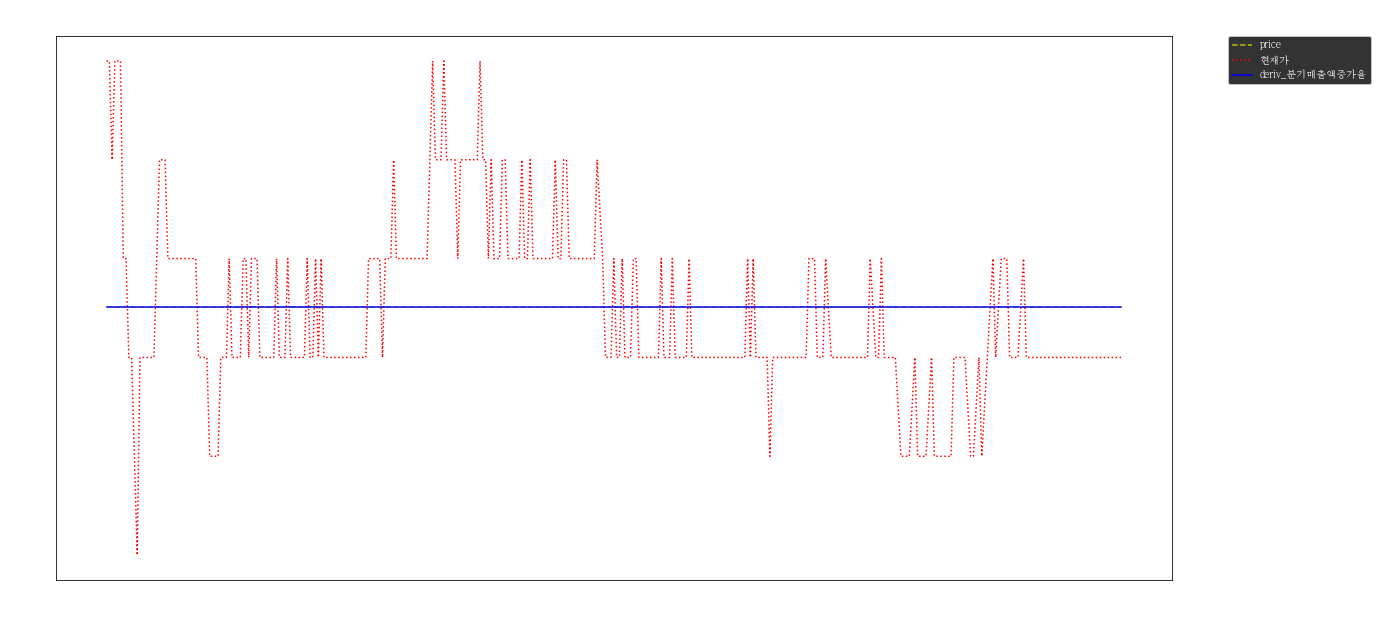

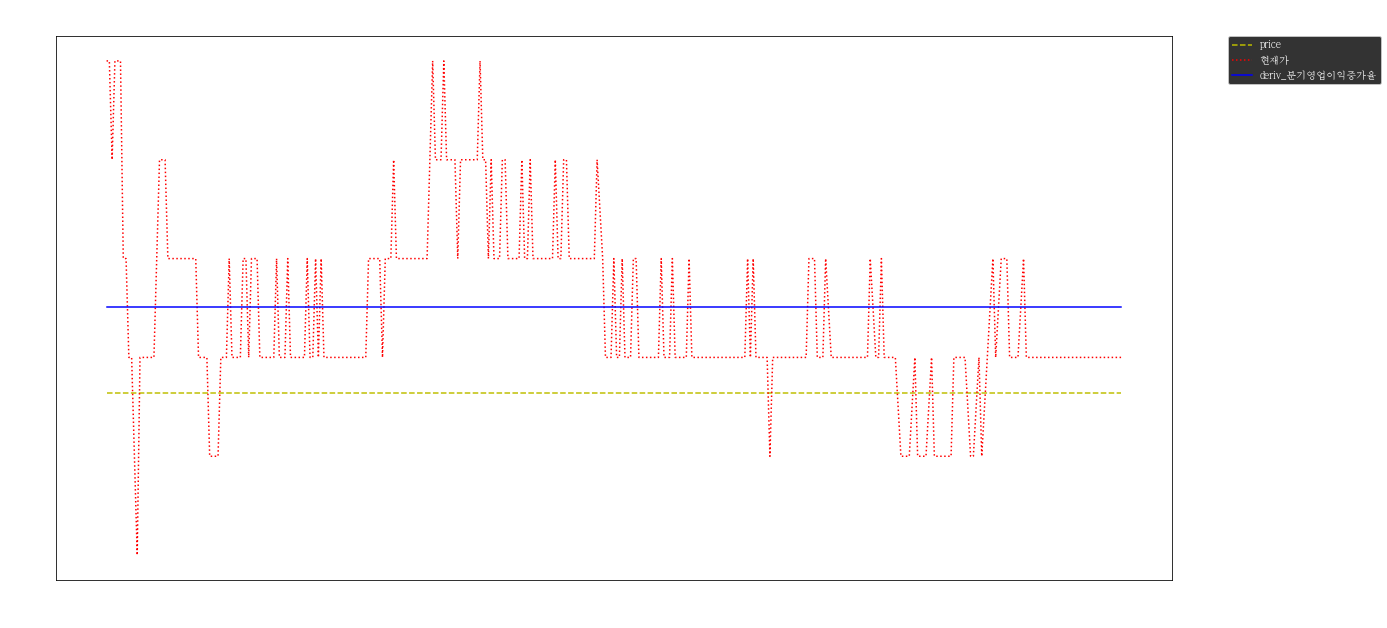

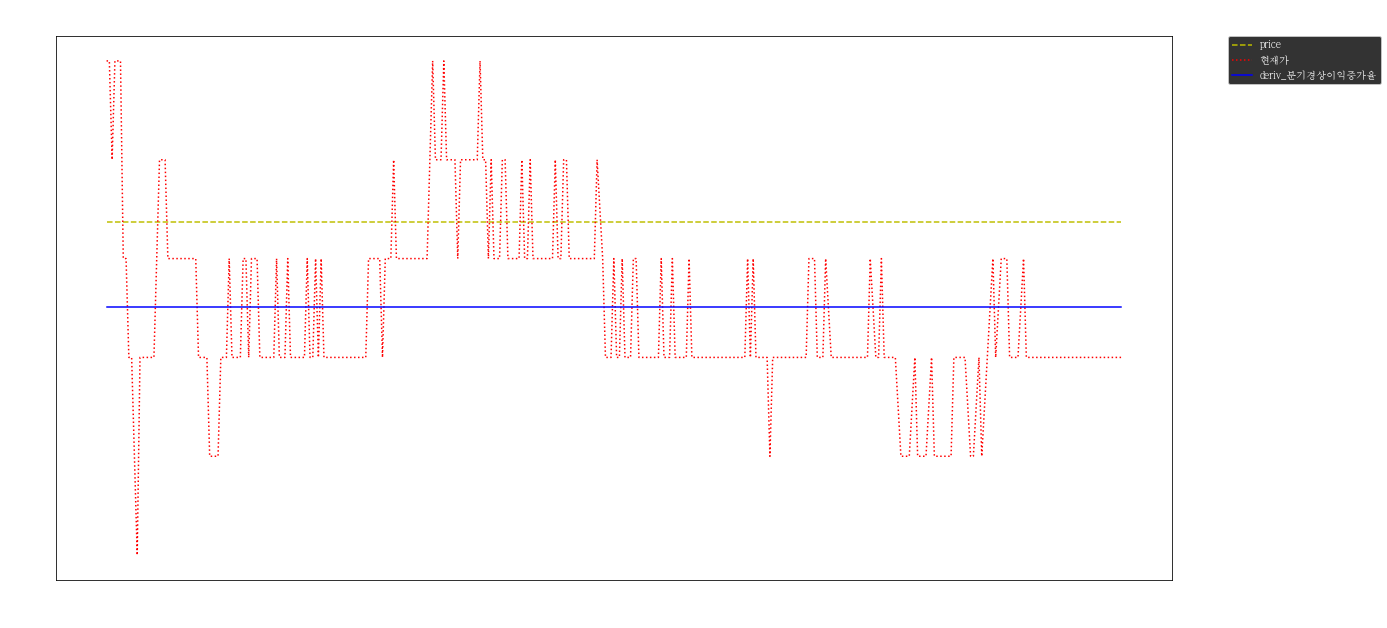

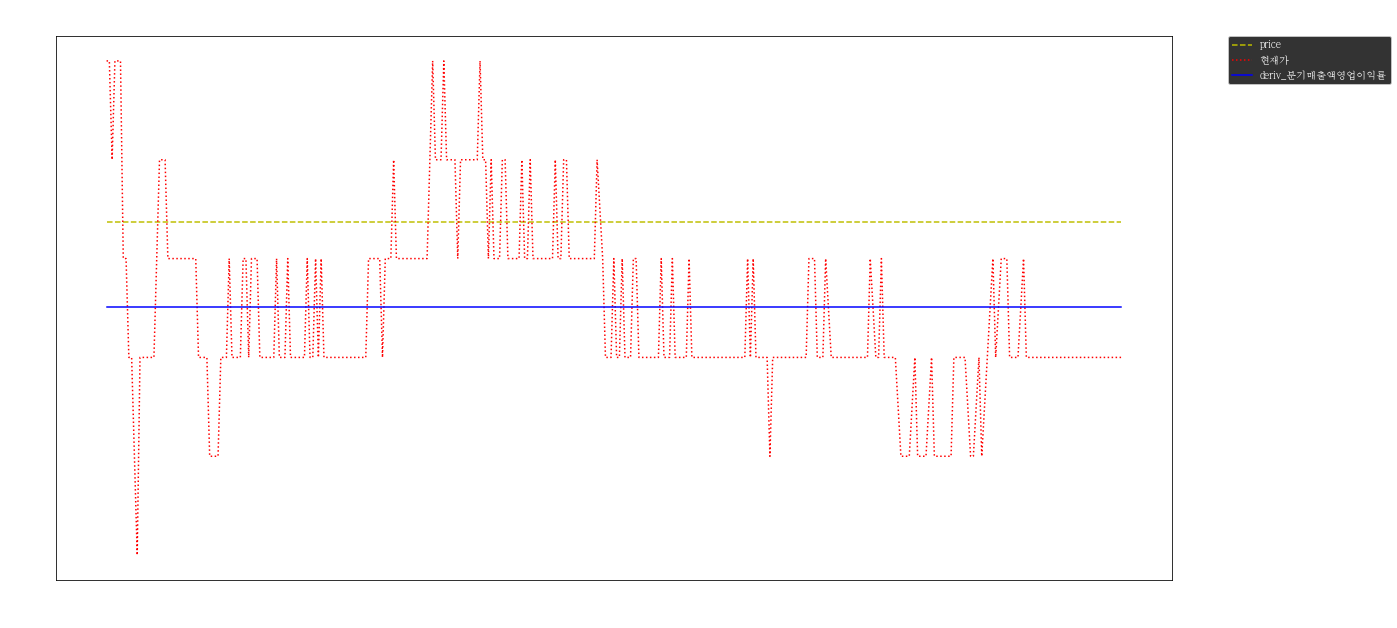

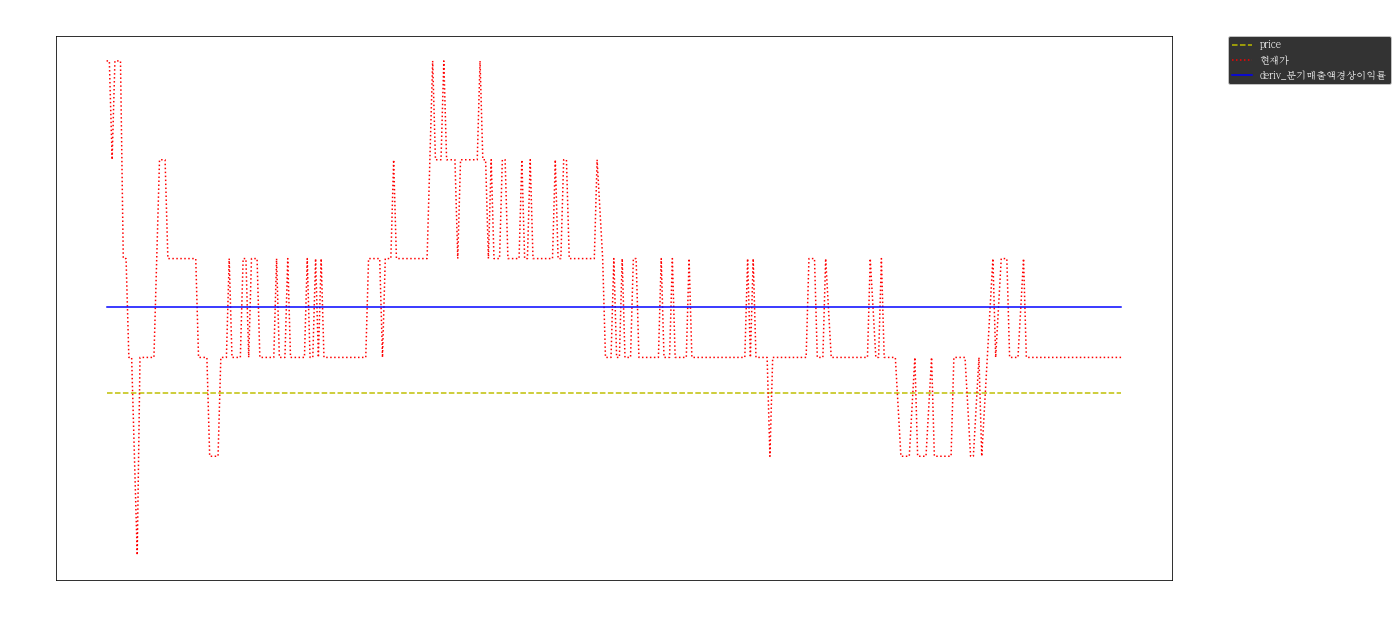

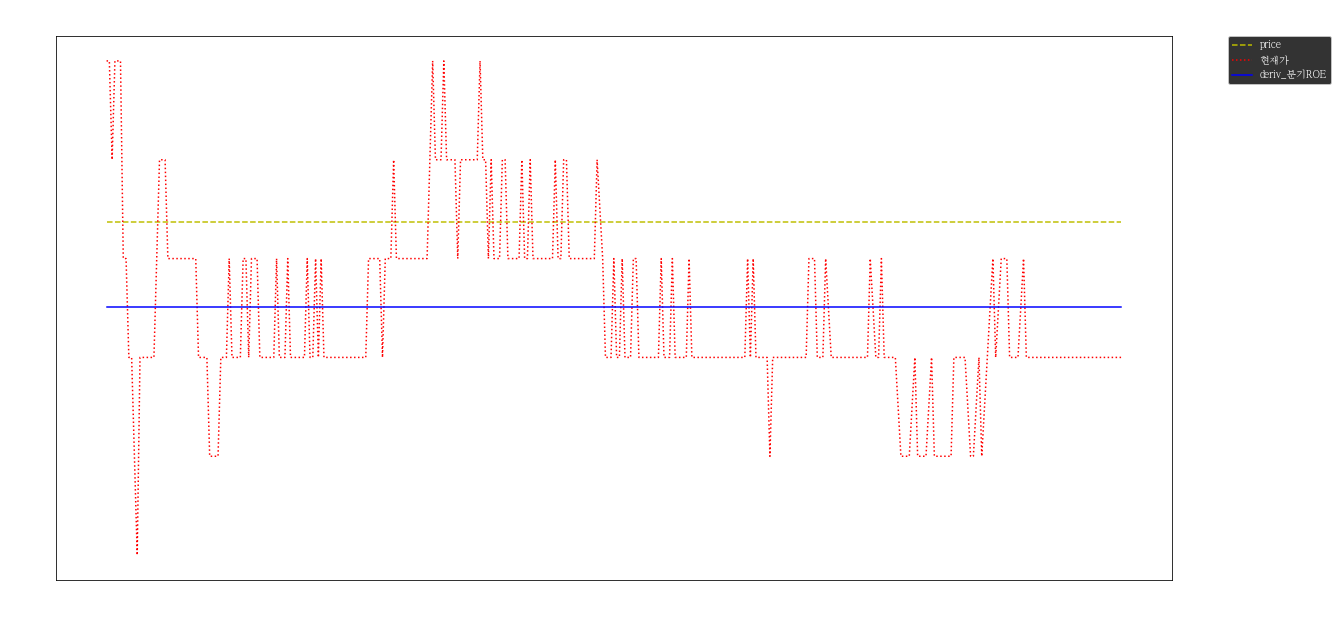

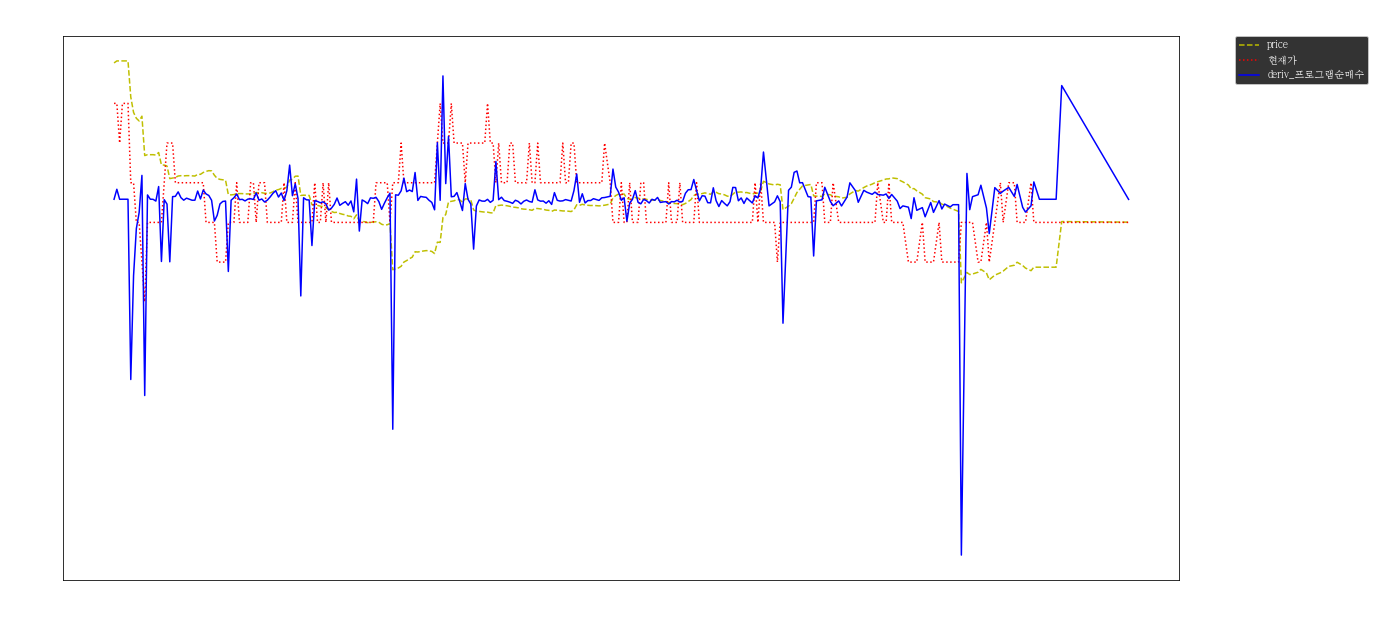

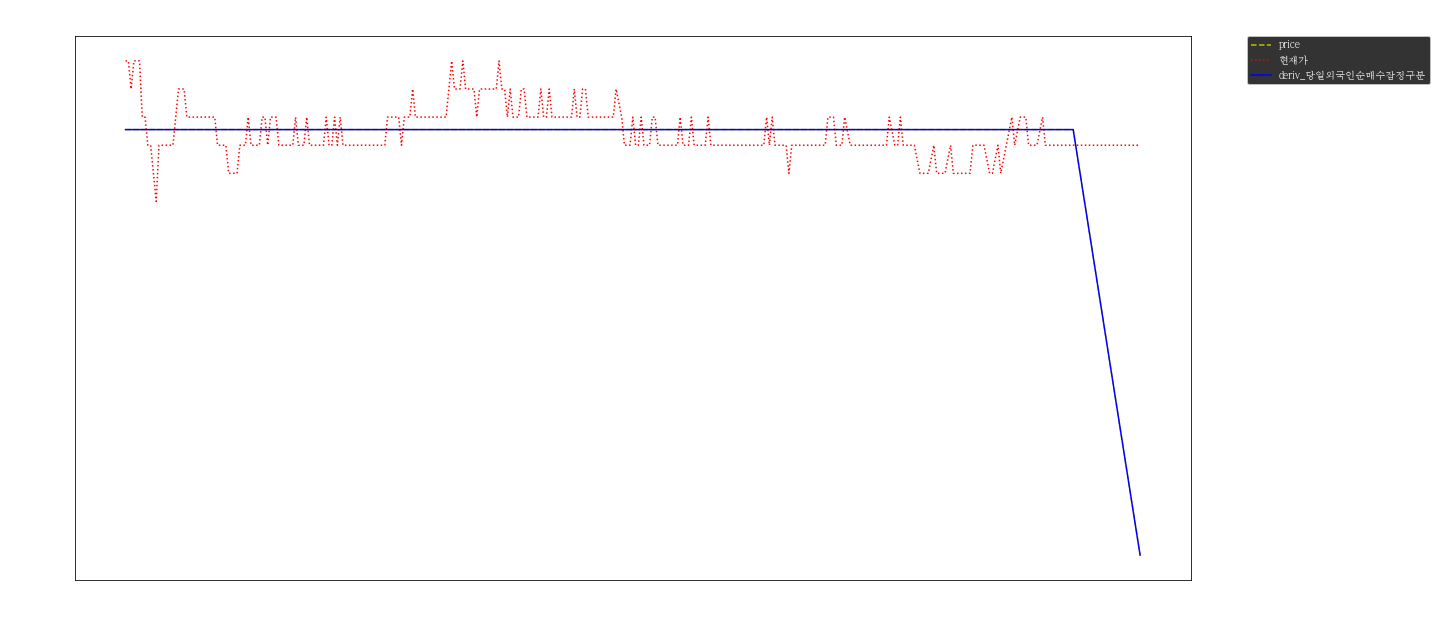

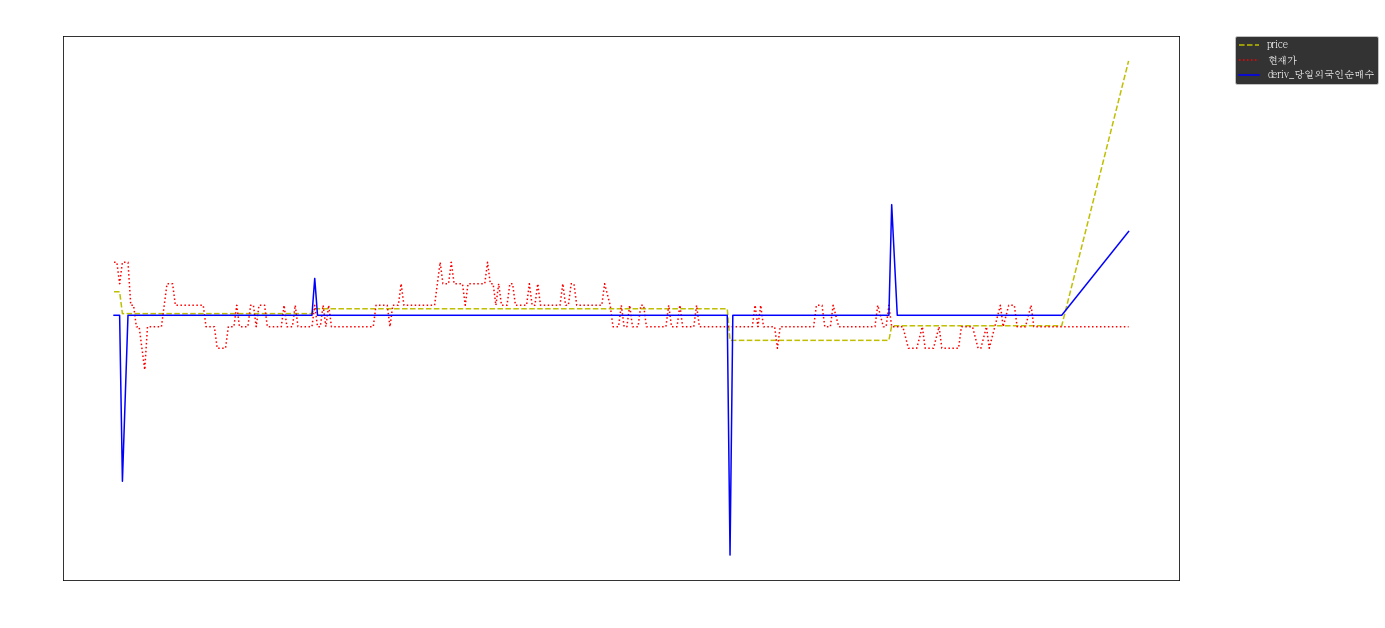

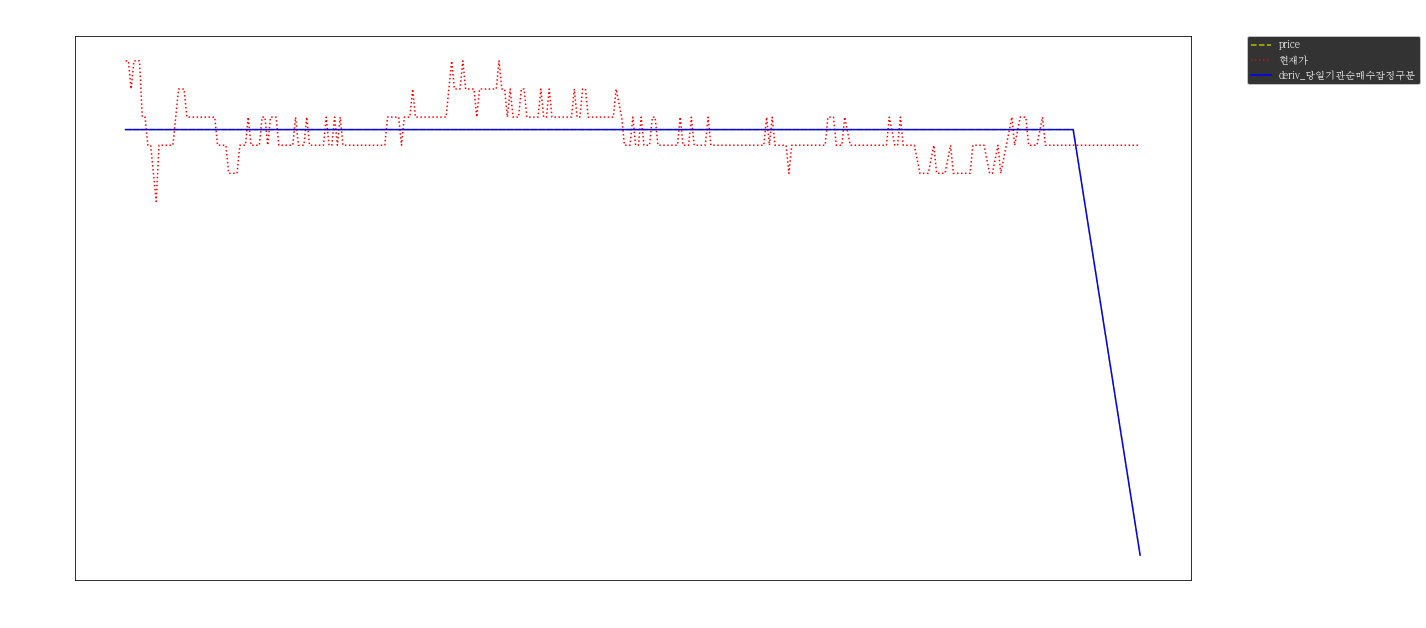

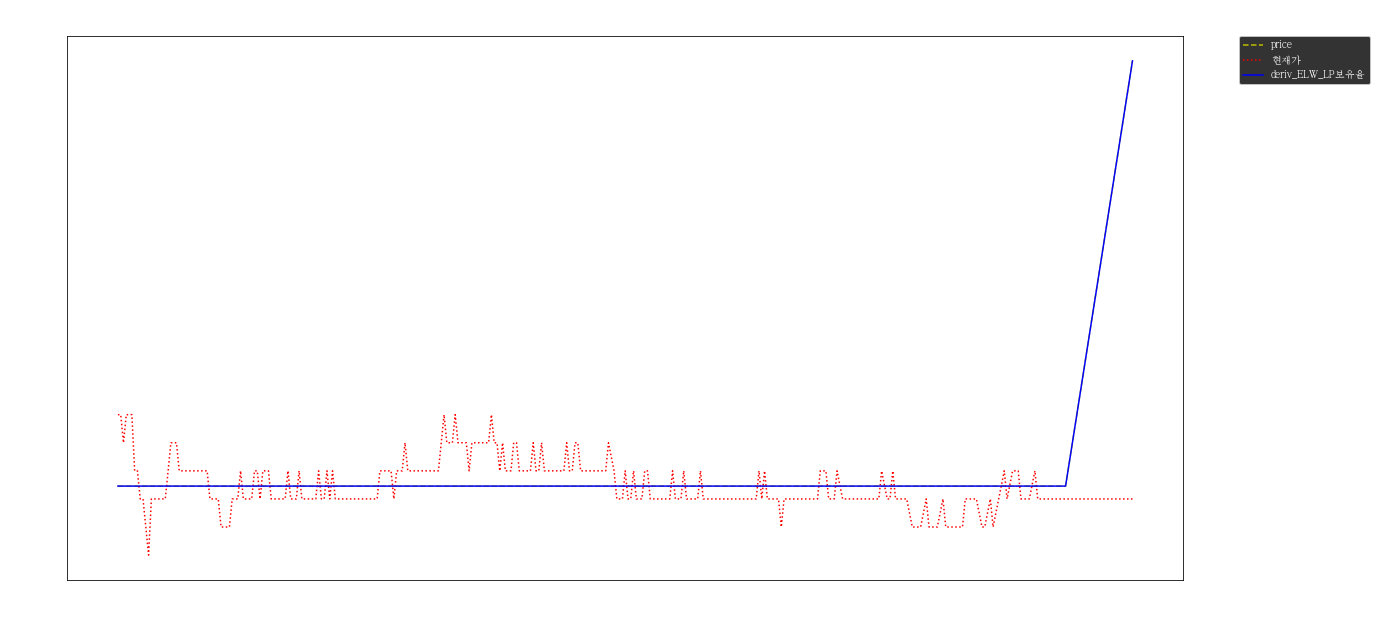

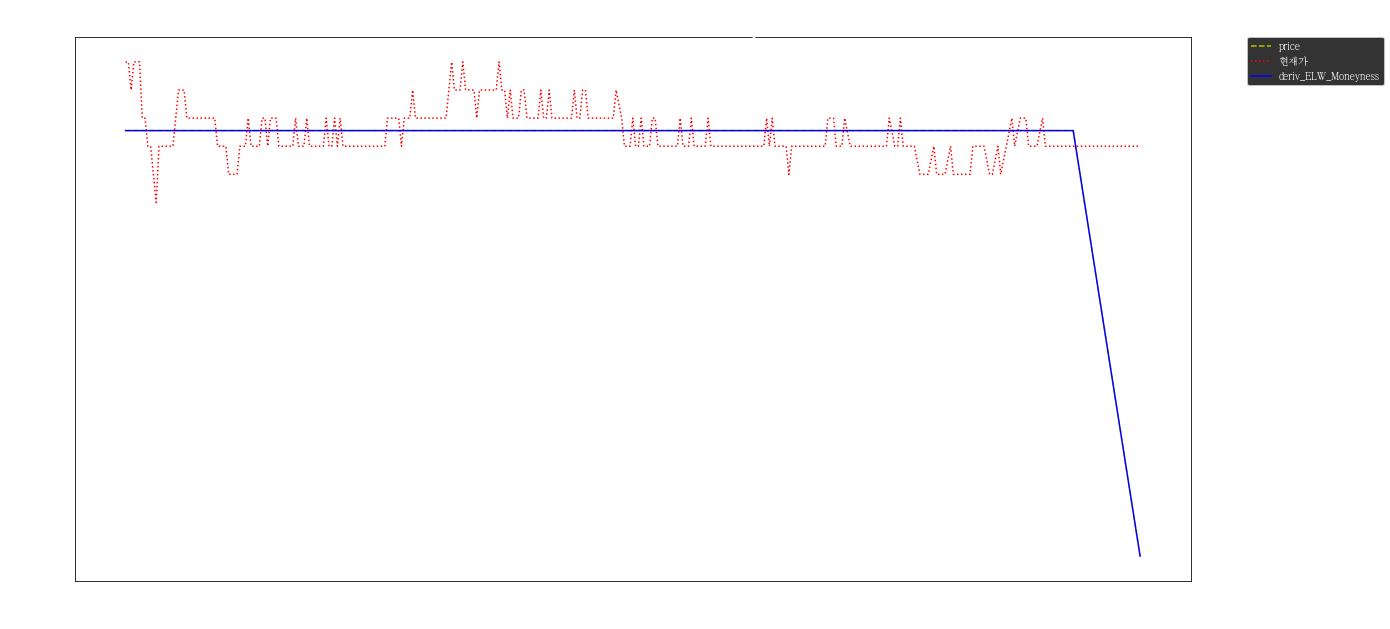

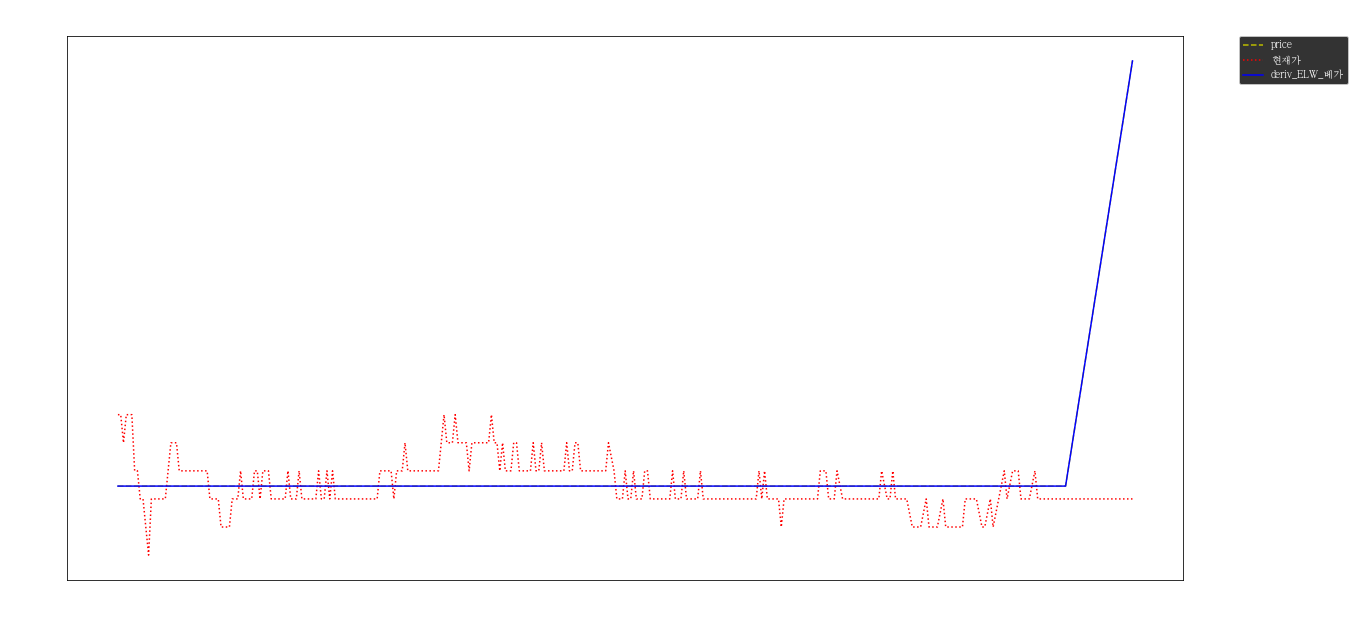

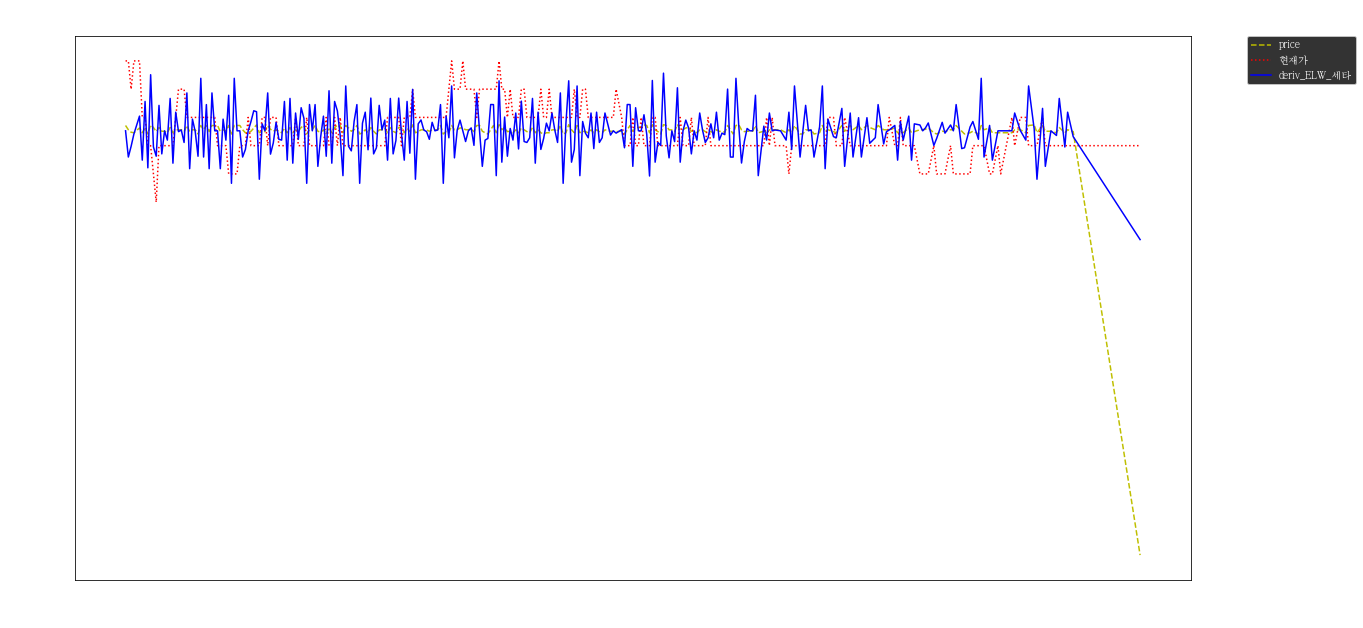

In [14]:
import random as rnd

plt.close('all')

code = df['종목코드'].iloc[rnd.randint(0, len(df))]
code_data = df[df['종목코드'] == code]
code_data['time_as_datetime'] = code_data['시간'].apply(int_to_time)
plotter = code_data.set_index('time_as_datetime')

"""     remove non-numeric and cols with no variance       """
plotter.drop([c for c in plotter.columns.values if 
              plotter[c].dtype not in ('int64', 'float64') or plotter[c].std() == 0]
             , axis=1 
             , inplace=True, errors='ignore')
target = '현재가' # what we want to predict
#we can only predict from numeric indicators
predictors = [c for c in plotter.columns.values if c not in (target, '시간')]

for i, c in enumerate(predictors):
    fig, ax = plt.subplots(figsize=(20, 10))
    title = r"%s vs. %s" % (target, c)
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('time')
    ax.set_ylabel('normalized values')
    ax.tick_params(axis='both', labelsize=15, colors='white')
    for xs in [ax.xaxis.label, ax.yaxis.label]:
        xs.set_color('white')
        xs.set_fontsize(15)

    plotter, deriv_col_name = get_time_derivative(plotter, code, c)
    plotter[c] = normalize_series(plotter[c])
    plotter[target] = normalize_series(plotter[target])
    plotter[deriv_col_name] = normalize_series(plotter[deriv_col_name])
    ax.plot(plotter[c], 'y--', label='price')
    ax.plot(plotter[target], 'r:', label=target)
    ax.plot(plotter[deriv_col_name], 'b', label=deriv_col_name)
    """   ADD LEGEND   """
    legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    legend.get_frame().set_facecolor('#000000')


plt.show()

In [20]:
"""     CLOSE TO SAVE MEMORY or buy another RAM ...     """
plt.close("all")

In [16]:
"""     TIME SERIES PREDICTION OF 현재가 FROM EBITDA"""
raw = df[df['종목코드'] == code]
raw['time_as_datetime'] = raw['시간'].apply(int_to_time)
raw = raw.set_index('time_as_datetime') # set datetime to index
raw.drop(['시간', 'time_as_datetime'], inplace=True, errors='ignore')
raw.head(10)
# ts_data = pd.Time

C:\Users\sh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>종목코드</th>
      <th>시간</th>
      <th>대비부호</th>
      <th>전일대비</th>
      <th>현재가</th>
      <th>시가</th>
      <th>고가</th>
      <th>저가</th>
      <th>매도호가</th>
      <th>매수호가</th>
      <th>...</th>
      <th>ELW_델타</th>
      <th>ELW_발행수량</th>
      <th>ELW_베가</th>
      <th>ELW_세타</th>
      <th>ELW_손익분기율</th>
      <th>ELW_역사적변동성</th>
      <th>ELW_자본지지점</th>
      <th>ELW_패리티</th>
      <th>ELW_프리미엄</th>
      <th>ELW_베리어</th>
    </tr>
    <tr>
      <th>time_as_datetime</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>2017-07-09 09:50:00</th>
      <td>A005380</td>
      <td>950</td>
      <td>53</td>
      <td>-2500</td>
      <td>153000</td>
      <td>153500</td>
      <td>154500</td>
      <td>152500</td>
      <td>153000</td>
      <td>152500</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1513</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:51:00</th>
      <td>A005380</td>
      <td>951</td>
      <td>53</td>
      <td>-2500</td>
      <td>153000</td>
      <td>153500</td>
      <td>154500</td>
      <td>152500</td>
      <td>153000</td>
      <td>152500</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>760</td>
      <td>10737418</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:52:00</th>
      <td>A005380</td>
      <td>952</td>
      <td>53</td>
      <td>-3000</td>
      <td>152500</td>
      <td>153500</td>
      <td>154500</td>
      <td>152500</td>
      <td>153000</td>
      <td>152500</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>315</td>
      <td>-1677722</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:53:00</th>
      <td>A005380</td>
      <td>953</td>
      <td>53</td>
      <td>-2500</td>
      <td>153000</td>
      <td>153500</td>
      <td>154500</td>
      <td>152500</td>
      <td>153000</td>
      <td>152500</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>225</td>
      <td>18790482</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:55:00</th>
      <td>A005380</td>
      <td>955</td>
      <td>53</td>
      <td>-2500</td>
      <td>153000</td>
      <td>153500</td>
      <td>154500</td>
      <td>152500</td>
      <td>153000</td>
      <td>152500</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>1068</td>
      <td>5368709</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:56:00</th>
      <td>A005380</td>
      <td>956</td>
      <td>53</td>
      <td>-3500</td>
      <td>152000</td>
      <td>153500</td>
      <td>154500</td>
      <td>152000</td>
      <td>152500</td>
      <td>152000</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>225</td>
      <td>18790482</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2017-07-09 09:

In [21]:
plt.close('all')
predictor = '현재가'
# p_ewma = '%s_ewma' % predictor
p_ewma = '현재가_ewma'
raw[p_ewma] = pd.ewma(raw[predictor], com=15)
print(raw[[predictor, p_ewma]].head(20))
f, ax = plt.subplots(figsize=(20, 10))

ax.plot(raw[predictor], label=predictor)
ax.plot(raw[p_ewma], label=p_ewma)
ax.tick_params(axis='both', labelsize=15, colors='white')
"""   ADD LEGEND   """
legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
legend.get_frame().set_facecolor('#000000')
plt.show()

C:\Users\sh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(com=15,min_periods=0,adjust=True,ignore_na=False).mean()
  """


                        현재가       현재가_ewma
time_as_datetime                          
2017-07-09 09:50:00  153000  153000.000000
2017-07-09 09:51:00  153000  153000.000000
2017-07-09 09:52:00  152500  152822.468793
2017-07-09 09:53:00  153000  152871.236000
2017-07-09 09:55:00  153000  152900.415282
2017-07-09 09:56:00  152000  152725.136733
2017-07-09 09:57:00  152000  152600.456837
2017-07-09 09:58:00  151500  152429.909172
2017-07-09 09:59:00  151500  152297.992340
2017-07-09 10:00:00  151000  152127.397643
2017-07-09 10:01:00  150500  151927.301853
2017-07-09 10:02:00  151500  151877.758314
2017-07-09 10:03:00  151500  151836.181196
2017-07-09 10:04:00  151500  151800.860136
2017-07-09 10:05:00  151500  151770.540667
2017-07-09 10:06:00  151500  151744.281756
2017-07-09 10:07:00  151500  151721.363629
2017-07-09 10:08:00  152000  151746.711012
2017-07-09 10:09:00  152500  151813.340361
2017-07-09 10:10:00  152500  151872.539958
